In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from time import sleep

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
import pickle
from IPython.display import IFrame

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

import requests
import config


In [7]:
#Importing the data
manu1 = pd.read_excel("20221012_IDF_75_all_v2.xls")
manu2 = pd.read_excel("20221012__IDF_75_lessP07_v2.xls")
manu3 = pd.read_excel("20221012_IDF_77-78-91-93_v2.xls")
manu4 = pd.read_excel("20221012_IDF_94-95_v2.xls")

In [8]:
manu4.shape

(15471, 39)

In [9]:
# Dropping lines with no Cy name (lines for extra manager names and affiliates...)
manu1= manu1.dropna(subset = ["Nom de l'entreprise"])
# dropping the columns that I will not use
columns_to_drop = ["Nom du CAC", "Nom de la banque", "Filiales - Nom", "Filiales - Mnémo", "Filiales - NACE - Code principal"]
manu1.drop(columns_to_drop, axis=1, inplace=True)

In [10]:
#Renaming the weird column
manu1.rename(columns = {"4585." : "index_xls"}, inplace=True)


In [11]:
#Checking for duplicates
manu1.duplicated().sum()

0

In [12]:
# to change the column titles

def clean_my_columns_titles(df):
    df.columns = df.columns.str.replace(" ","_").str.lower().str.strip() 
    return df                                                             

In [13]:
# changing the column titles for a new df
df_1 = manu1.copy()
clean_my_columns_titles(df_1)

,index_xls,nom_de_l'entreprise,numéro_siren,code_postal,ville,"naf_rév._2,_code_principal_(code)",description_de_l’activité,effectif_moyen\ndernière_année_disp.,chiffre_d'affaires_net\nkeur\ndernière_année_disp.,dotations_d'expl._sur_immob.:_amort.\nkeur\ndernière_année_disp.,...,dirigeant\ndate_de_naissance,tête_de_groupe_-_nom,actionnaire_immédiat_-_nom,actionnaire_immédiat_-_prénom,tête_de_groupe_-_prénom,tête_de_groupe_-_%_direct,actionnaire_immédiat_-_%_direct,actionnaires_de_référence_-_nom,actionnaires_de_référence_-_prénom,actionnaires_de_référence_-_%_direct
0,1.0,ELECTRICITE DE FRANCE,552081317.0,75008.0,PARIS,3511Z,"Production, transport, distribution, négoce, f...",62035,5.300100e+07,4363000,...,18/03/1955,GOVERNMENT OF FRANCE,AGENCE DES PARTICIPATIONS DE L'ETAT,NaN,NaN,-,"79,01",GOVERNMENT OF FRANCE,NaN,"100,00"
1,4586.0,SYXPERIANE,497541599.0,75002.0,PARIS,6202A,"Conseil en management, organisation et mise en...",53,7.917710e+03,36.82,...,18/03/1955,MR LAURENT ANDRE FLEURY,SYXPERIANE GROUP,NaN,LAURENT ANDRE,-,"100,00",AGENCE DES PARTICIPATIONS DE L'ETAT,LAURENT ANDRE,"79,01"
3,4587.0,GD REAUMUR,814116612.0,75002.0,PARIS,7010Z,Toutes activités se rapportant à l'habillement...,153,7.911101e+03,0,...,23/06/1962,HOLDING GDLMA,DS FASHION GROUP,NaN,NaN,-,"100,00",HOLDING GDLMA,NaN,"100,00"
6,4588.0,LES TRESORS DE GAMBRINUS,439430364.0,75012.0,PARIS,4634Z,"Négoce en gros, au détail de toutes boissons e...",n.d.,7.909862e+03,73.17,...,26/09/1964,LES TRESORS DE GAMBRINUS,NaN,NaN,NaN,"100,00",NaN,NaN,NaN,NaN
11,4589.0,CLIM DENFERT - BOURQUIN,349349282.0,75116.0,PARIS,4322B,NaN,n.d.,7.907752e+03,87.766,...,15/11/1963,MR GILLES PIERRE CHARLES BOURQUIN,GROUPE BOURQU'1,NaN,GILLES PIERRE CHARLES,-,"99,99",MR GILLES PIERRE CHARLES BOURQUIN,GILLES PIERRE CHARLES,"51,96"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65524,4580.0,EDITIONS STOCK,612035659.0,75006.0,PARIS,5811Z,NaN,19,7.926831e+03,2.969,...,NaN,LAGARDERE SA,HACHETTE LIVRE,NaN,NaN,-,"100,00",LAGARDERE SA,NaN,"100,00"
65529,4581.0,FED FRANC SAUVETAGE SECOURISME,784714164.0,75017.0,PARIS,9312Z,NaN,n.d.,7.925589e+03,30.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65530,4582.0,SAINTE HEMOISE 55,533022083.0,75008.0,PARIS,5610A,"La restauration sur place et à emporter, le sa...",57,7.921449e+03,375.36,...,NaN,MR CLAUDE LOUZON,MR CLAUDE LOUZON,CLAUDE,CLAUDE,-,-,MR CLAUDE LOUZON,CLAUDE,-
65532,4583.0,PREFON DISTRIBUTION,794053629.0,75008.0,PARIS,6622Z,Courtage d'assurance.,n.d.,7.920713e+03,9.82,...,18/03/1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Dropping lines with no Cy name (lines for extra manager names and affiliates...)
def clear_na(df):
    df= df.dropna(subset = ["Nom de l'entreprise"])
    return df

def preparing_df(df):
    # dropping the columns that I will not use
    columns_to_drop = ["Nom du CAC", "Nom de la banque", "Filiales - Nom", "Filiales - Mnémo", "Filiales - NACE - Code principal"]
    df.drop(columns_to_drop, axis=1, inplace=True)
    df.rename(columns = {"Unnamed: 0" : "index_xls"}, inplace=True)
    clean_my_columns_titles(df)
    return df

In [15]:
# dropping the lines
manu2 = clear_na(manu2)
manu3= clear_na(manu3)
manu4= clear_na(manu4)

In [16]:
#saving the intermediary dataframes
df_2= manu2.copy()
df_3= manu3.copy()
df_4= manu4.copy()

In [17]:
# Getting ready for concat
df_2 = preparing_df(df_2)
df_3 = preparing_df(df_3)
df_4 = preparing_df(df_4)

In [18]:
# Concatenating the 4 tables
df = pd.concat([df_1, df_2, df_3, df_4], axis = 0)
df.shape, df_1.shape, df_2.shape, df_3.shape,df_4.shape

((16932, 34), (5008, 34), (4834, 34), (4830, 34), (2260, 34))

In [19]:
# Dropping the extra column and resetting the index
df.drop(['index_xls'], axis=1, inplace=True)
df.reset_index(drop = True)

,nom_de_l'entreprise,numéro_siren,code_postal,ville,"naf_rév._2,_code_principal_(code)",description_de_l’activité,effectif_moyen\ndernière_année_disp.,chiffre_d'affaires_net\nkeur\ndernière_année_disp.,dotations_d'expl._sur_immob.:_amort.\nkeur\ndernière_année_disp.,résultat_d'expl.\nkeur\ndernière_année_disp.,...,dirigeant\ndate_de_naissance,tête_de_groupe_-_nom,actionnaire_immédiat_-_nom,actionnaire_immédiat_-_prénom,tête_de_groupe_-_prénom,tête_de_groupe_-_%_direct,actionnaire_immédiat_-_%_direct,actionnaires_de_référence_-_nom,actionnaires_de_référence_-_prénom,actionnaires_de_référence_-_%_direct
0,ELECTRICITE DE FRANCE,552081317.0,75008.0,PARIS,3511Z,"Production, transport, distribution, négoce, f...",62035,5.300100e+07,4363000,2567000,...,18/03/1955,GOVERNMENT OF FRANCE,AGENCE DES PARTICIPATIONS DE L'ETAT,NaN,NaN,-,"79,01",GOVERNMENT OF FRANCE,NaN,"100,00"
1,SYXPERIANE,497541599.0,75002.0,PARIS,6202A,"Conseil en management, organisation et mise en...",53,7.917710e+03,36.82,1896.002,...,18/03/1955,MR LAURENT ANDRE FLEURY,SYXPERIANE GROUP,NaN,LAURENT ANDRE,-,"100,00",AGENCE DES PARTICIPATIONS DE L'ETAT,LAURENT ANDRE,"79,01"
2,GD REAUMUR,814116612.0,75002.0,PARIS,7010Z,Toutes activités se rapportant à l'habillement...,153,7.911101e+03,0,338.325,...,23/06/1962,HOLDING GDLMA,DS FASHION GROUP,NaN,NaN,-,"100,00",HOLDING GDLMA,NaN,"100,00"
3,LES TRESORS DE GAMBRINUS,439430364.0,75012.0,PARIS,4634Z,"Négoce en gros, au détail de toutes boissons e...",n.d.,7.909862e+03,73.17,242.812,...,26/09/1964,LES TRESORS DE GAMBRINUS,NaN,NaN,NaN,"100,00",NaN,NaN,NaN,NaN
4,CLIM DENFERT - BOURQUIN,349349282.0,75116.0,PARIS,4322B,NaN,n.d.,7.907752e+03,87.766,108.573,...,15/11/1963,MR GILLES PIERRE CHARLES BOURQUIN,GROUPE BOURQU'1,NaN,GILLES PIERRE CHARLES,-,"99,99",MR GILLES PIERRE CHARLES BOURQUIN,GILLES PIERRE CHARLES,"51,96"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16927,ELICOM,334226859.0,95480.0,PIERRELAYE,6110Z,NaN,n.d.,5.008089e+03,3.969,220.885,...,23/07/1957,5EME AVENUE,5EME AVENUE,NaN,NaN,"100,00","100,00",5EME AVENUE,NaN,"100,00"
16928,FACILY BAT,499793651.0,95310.0,ST OUEN L AUMONE,4399C,"Entreprise générale de bâtiment, toutes activi...",12,5.007688e+03,11.585,297.995,...,02/01/1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16929,CARLO GAVAZZI SARL,314008384.0,95700.0,ROISSY EN FRANCE,4652Z,NaN,12,5.007108e+03,20.139,306.949,...,1962,MRS VALERIA MARIA TERESA GAVAZZI PREMOLI-TROVATI,CARLO GAVAZZI PARTICIPATION DANMARK A/S,NaN,VALERIA MARIA TERESA,-,"100,00",MRS VALERIA MARIA TERESA GAVAZZI PREMOLI-TROVATI,VALERIA MARIA TERESA,"100,00"
16930,EIFFAGE ENERGIE SYSTEMES - SEATH,381793280.0,94500.0,CHAMPIGNY SUR MARNE,4322B,"Etudes, ingénierie, conception, réalisation, m...",29,5.006900e+03,42.708,314.074,...,NaN,EIFFAGE,EIFFAGE ENERGIE SYSTEMES - REGIONS FRANCE,NaN,NaN,-,"100,00",EIFFAGE,NaN,"100,00"


In [20]:
# Organising the formats and datatypes of the columns

In [21]:
#Changing the column names in English
english_names = ["name", "siren", "post_code", "city", "naf2_code", "naf2_activity", "avg_workforce",  "revenue",
                "depre_amort", "operating_income", "convert_bonds", "other_bonds", "loans_less_1yr", "loans_more_1yr",
                "other_loans", "debts_to_group", "commit_mov_prop", "commit_immov_prop", "bills_exch", "cash", "market_security",
                "ceo", "natural_or_legal", "date_of_birth", "group_head", "shareholder", "shareholder_1stname", 
                 "group_head_1stname", "group_head_share","shareholder_share", "reference_shareholder", "reference_shareholder_1stname",
                "reference_shareholder_share"]

In [22]:
len(english_names), len(df.columns)

(33, 33)

In [23]:
df.columns = english_names

In [24]:
# Making groups of data
general = ["name", "siren", "post_code", "city", "naf2_code", "naf2_activity"]
numbers = ["avg_workforce",  "revenue", "depre_amort", "operating_income", "convert_bonds", "other_bonds", "loans_less_1yr", 
           "loans_more_1yr", "other_loans", "debts_to_group", "commit_mov_prop", "commit_immov_prop", "bills_exch", "cash",
           "market_security"]
management = ["ceo", "natural_or_legal", "date_of_birth", "group_head", "shareholder", "shareholder_1stname", 
              "group_head_1stname", "reference_shareholder", 
              "reference_shareholder_1stname"]
shares = ["group_head_share","shareholder_share","reference_shareholder_share"]


In [25]:
df[numbers].isna().sum()

avg_workforce        0
revenue              0
depre_amort          0
operating_income     0
convert_bonds        0
other_bonds          0
loans_less_1yr       0
loans_more_1yr       0
other_loans          0
debts_to_group       0
commit_mov_prop      0
commit_immov_prop    0
bills_exch           0
cash                 0
market_security      0
dtype: int64

In [26]:
# changing the siren and post_code in integer
for col in ['siren', 'post_code']:
    df[col]= df[col].astype(int)

# changing the name, naf2_code, city, naf2_activity  in string
for col in ['name', 'naf2_code', 'city', 'naf2_activity']:
    df[col]= df[col].astype(str)

In [27]:
# import numpy as np #(moved at the beginning)

In [28]:
#changing the columns in numbers and inserting -1 when n.d.
for col in numbers:
    df[col] = df[col].replace('n.d.', np.nan)
    df[col] = df[col].astype(float)
    df[col] = df[col].fillna(-1)
df.tail(5)

,name,siren,post_code,city,naf2_code,naf2_activity,avg_workforce,revenue,depre_amort,operating_income,...,date_of_birth,group_head,shareholder,shareholder_1stname,group_head_1stname,group_head_share,shareholder_share,reference_shareholder,reference_shareholder_1stname,reference_shareholder_share
15449,ELICOM,334226859,95480,PIERRELAYE,6110Z,nan,-1.0,5008.089,3.969,220.885,...,23/07/1957,5EME AVENUE,5EME AVENUE,NaN,NaN,"100,00","100,00",5EME AVENUE,NaN,"100,00"
15456,FACILY BAT,499793651,95310,ST OUEN L AUMONE,4399C,"Entreprise générale de bâtiment, toutes activi...",12.0,5007.688,11.585,297.995,...,02/01/1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15457,CARLO GAVAZZI SARL,314008384,95700,ROISSY EN FRANCE,4652Z,nan,12.0,5007.108,20.139,306.949,...,1962,MRS VALERIA MARIA TERESA GAVAZZI PREMOLI-TROVATI,CARLO GAVAZZI PARTICIPATION DANMARK A/S,NaN,VALERIA MARIA TERESA,-,"100,00",MRS VALERIA MARIA TERESA GAVAZZI PREMOLI-TROVATI,VALERIA MARIA TERESA,"100,00"
15462,EIFFAGE ENERGIE SYSTEMES - SEATH,381793280,94500,CHAMPIGNY SUR MARNE,4322B,"Etudes, ingénierie, conception, réalisation, m...",29.0,5006.900,42.708,314.074,...,NaN,EIFFAGE,EIFFAGE ENERGIE SYSTEMES - REGIONS FRANCE,NaN,NaN,-,"100,00",EIFFAGE,NaN,"100,00"
15467,DB PHARMA,378214886,94210,ST MAUR DES FOSSES,4646Z,"Exploitation, achat, vente de toutes marques p...",-1.0,5001.774,10.861,748.312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.columns

Index(['name', 'siren', 'post_code', 'city', 'naf2_code', 'naf2_activity',
       'avg_workforce', 'revenue', 'depre_amort', 'operating_income',
       'convert_bonds', 'other_bonds', 'loans_less_1yr', 'loans_more_1yr',
       'other_loans', 'debts_to_group', 'commit_mov_prop', 'commit_immov_prop',
       'bills_exch', 'cash', 'market_security', 'ceo', 'natural_or_legal',
       'date_of_birth', 'group_head', 'shareholder', 'shareholder_1stname',
       'group_head_1stname', 'group_head_share', 'shareholder_share',
       'reference_shareholder', 'reference_shareholder_1stname',
       'reference_shareholder_share'],
      dtype='object')

In [30]:
# changing the others in string
for col in ["ceo", "natural_or_legal", "group_head", "shareholder", "shareholder_1stname","group_head_1stname","reference_shareholder","reference_shareholder_1stname"]:
    df[col]= df[col].astype(str)

In [31]:
df.reset_index(drop=True)

,name,siren,post_code,city,naf2_code,naf2_activity,avg_workforce,revenue,depre_amort,operating_income,...,date_of_birth,group_head,shareholder,shareholder_1stname,group_head_1stname,group_head_share,shareholder_share,reference_shareholder,reference_shareholder_1stname,reference_shareholder_share
0,ELECTRICITE DE FRANCE,552081317,75008,PARIS,3511Z,"Production, transport, distribution, négoce, f...",62035.0,5.300100e+07,4363000.000,2567000.000,...,18/03/1955,GOVERNMENT OF FRANCE,AGENCE DES PARTICIPATIONS DE L'ETAT,nan,nan,-,"79,01",GOVERNMENT OF FRANCE,nan,"100,00"
1,SYXPERIANE,497541599,75002,PARIS,6202A,"Conseil en management, organisation et mise en...",53.0,7.917710e+03,36.820,1896.002,...,18/03/1955,MR LAURENT ANDRE FLEURY,SYXPERIANE GROUP,nan,LAURENT ANDRE,-,"100,00",AGENCE DES PARTICIPATIONS DE L'ETAT,LAURENT ANDRE,"79,01"
2,GD REAUMUR,814116612,75002,PARIS,7010Z,Toutes activités se rapportant à l'habillement...,153.0,7.911101e+03,0.000,338.325,...,23/06/1962,HOLDING GDLMA,DS FASHION GROUP,nan,nan,-,"100,00",HOLDING GDLMA,nan,"100,00"
3,LES TRESORS DE GAMBRINUS,439430364,75012,PARIS,4634Z,"Négoce en gros, au détail de toutes boissons e...",-1.0,7.909862e+03,73.170,242.812,...,26/09/1964,LES TRESORS DE GAMBRINUS,nan,nan,nan,"100,00",NaN,nan,nan,NaN
4,CLIM DENFERT - BOURQUIN,349349282,75116,PARIS,4322B,nan,-1.0,7.907752e+03,87.766,108.573,...,15/11/1963,MR GILLES PIERRE CHARLES BOURQUIN,GROUPE BOURQU'1,nan,GILLES PIERRE CHARLES,-,"99,99",MR GILLES PIERRE CHARLES BOURQUIN,GILLES PIERRE CHARLES,"51,96"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16927,ELICOM,334226859,95480,PIERRELAYE,6110Z,nan,-1.0,5.008089e+03,3.969,220.885,...,23/07/1957,5EME AVENUE,5EME AVENUE,nan,nan,"100,00","100,00",5EME AVENUE,nan,"100,00"
16928,FACILY BAT,499793651,95310,ST OUEN L AUMONE,4399C,"Entreprise générale de bâtiment, toutes activi...",12.0,5.007688e+03,11.585,297.995,...,02/01/1965,nan,nan,nan,nan,NaN,NaN,nan,nan,NaN
16929,CARLO GAVAZZI SARL,314008384,95700,ROISSY EN FRANCE,4652Z,nan,12.0,5.007108e+03,20.139,306.949,...,1962,MRS VALERIA MARIA TERESA GAVAZZI PREMOLI-TROVATI,CARLO GAVAZZI PARTICIPATION DANMARK A/S,nan,VALERIA MARIA TERESA,-,"100,00",MRS VALERIA MARIA TERESA GAVAZZI PREMOLI-TROVATI,VALERIA MARIA TERESA,"100,00"
16930,EIFFAGE ENERGIE SYSTEMES - SEATH,381793280,94500,CHAMPIGNY SUR MARNE,4322B,"Etudes, ingénierie, conception, réalisation, m...",29.0,5.006900e+03,42.708,314.074,...,NaN,EIFFAGE,EIFFAGE ENERGIE SYSTEMES - REGIONS FRANCE,nan,nan,-,"100,00",EIFFAGE,nan,"100,00"


In [32]:
# changing the date in date
df["date_of_birth"]=df["date_of_birth"].apply(lambda x: str(x)[-4:])
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"],format = '%Y')

In [33]:
df["date_of_birth"].value_counts()

date_of_birth
1967-01-01    538
1965-01-01    527
1966-01-01    492
1970-01-01    489
1968-01-01    482
             ... 
1931-01-01      1
1930-01-01      1
2001-01-01      1
1925-01-01      1
1922-01-01      1
Name: count, Length: 78, dtype: int64

In [34]:
# changing the numeral columns of the management part
for col in ["group_head_share","shareholder_share", "reference_shareholder_share"]:
    df[col] = df[col].str.replace('n.d.','n').str.replace('-', 'n').str.replace('>', '').str.replace(',', '.').replace('MO','n').replace('WO', 'n').replace('NG', 'n')
    df[col] = df[col].replace('n', np.nan)
    df[col] = df[col].astype(float)/100
    df[col] = df[col].fillna(-1)

In [35]:
df.dtypes

name                                     object
siren                                     int32
post_code                                 int32
city                                     object
naf2_code                                object
naf2_activity                            object
avg_workforce                           float64
revenue                                 float64
depre_amort                             float64
operating_income                        float64
convert_bonds                           float64
other_bonds                             float64
loans_less_1yr                          float64
loans_more_1yr                          float64
other_loans                             float64
debts_to_group                          float64
commit_mov_prop                         float64
commit_immov_prop                       float64
bills_exch                              float64
cash                                    float64
market_security                         

In [36]:
# check for duplicates
# EDA to be done
# convert infogreffe revenues...

In [37]:
# import matplotlib.pyplot as plt # done above
# import seaborn as sns

In [38]:
def cat_stats(df, column):
    """Function to generate the statistical data for categorical columns"""
    print(f'****** Brief analysis of {column} *****')
    frequency_table = df[column].value_counts()
    # Calculating the proportion of each unique value 
    proportion_table = df[column].value_counts(normalize=True)
    display(frequency_table, proportion_table)
      
    mode_col = df[column].mode()
    display(f'mode = {mode_col}')
          
    # Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
    sns.countplot(data=df, x= column, palette="Set1")
    plt.show()

In [39]:
# to keep as long as not working via the function_file.py (Javier) -ot gives an intermittent error sometimes
# it works other times no, so was kept to run the code
def num_stats(df, column):
    """Function to generate the statistical data for numerical columns à la describe with mode in addition"""
    print(f'****** Brief Analysis of {column} *****')
          
    mean_col = df[column].mean().round()
    median_col = df[column].median()
    mode_col = df[column].mode()[0]
    variance_col = round(df[column].var(),2)
    std_dev_col = round(df[column].std(),2)
    min_col = df[column].min()
    max_col = df[column].max()
    range_col = max_col - min_col
    quantiles_col = df[column].quantile([0.25, 0.5, 0.75])

    print(f'mean= {mean_col}, median= {median_col}, mode= {mode_col}')
    print(f'var = {variance_col}, std_dev = {std_dev_col}, min = {min_col}, max = {max_col}, range = {range_col}')
    print(f'quantiles : \n{quantiles_col}')
    
    # Plotting a histogram for the column of the 'data' dataframe
    # 'bins=30' divides the data into 30 bins for more detailed granularity
    sns.histplot(df[column], kde=True, bins=30, color="blue")
    plt.show()  # to show the plot as it goes!
    sns.boxplot(data = df[column], color="lightgreen")
    plt.show()  # to show the plot as it goes!

In [40]:
general = ["name", "siren", "post_code", "city", "naf2_code", "naf2_activity"]
numbers = ["avg_workforce",  "revenue", "depre_amort", "operating_income", "convert_bonds", "other_bonds", "loans_less_1yr", 
           "loans_more_1yr", "other_loans", "debts_to_group", "commit_mov_prop", "commit_immov_prop", "bills_exch", "cash",
           "market_security"]
management = ["ceo", "natural_or_legal", "date_of_birth", "group_head", "shareholder", "shareholder_1stname", 
              "group_head_1stname", "group_head_share","shareholder_share", "reference_shareholder", 
              "reference_shareholder_1stname", "reference_shareholder_share"]

****** Brief analysis of post_code *****


post_code
75008    2592
75009    1005
75002     745
75017     708
75116     684
         ... 
78780       1
77880       1
77138       1
78330       1
94480       1
Name: count, Length: 424, dtype: int64

post_code
75008    0.153083
75009    0.059355
75002    0.044000
75017    0.041814
75116    0.040397
           ...   
78780    0.000059
77880    0.000059
77138    0.000059
78330    0.000059
94480    0.000059
Name: proportion, Length: 424, dtype: float64

'mode = 0    75008\nName: post_code, dtype: int32'

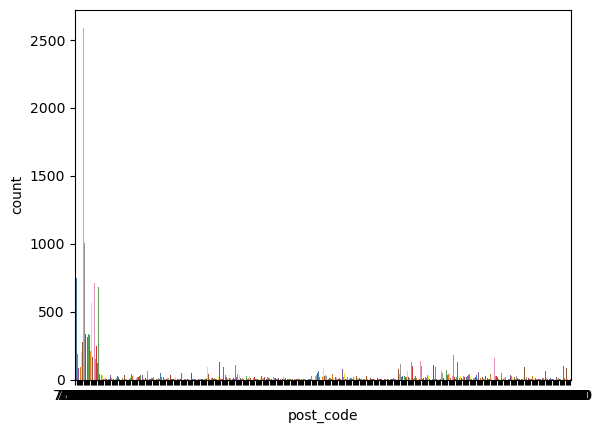

****** Brief analysis of city *****


city
PARIS                  9738
ST DENIS                227
RUNGIS                  179
CHEVILLY LARUE          159
TREMBLAY EN FRANCE      135
                       ... 
VERNEUIL L ETANG          1
FONTAINE FOURCHES         1
VILLENEUVE LE COMTE       1
VILLIERS EN BIERE         1
GENAINVILLE               1
Name: count, Length: 580, dtype: int64

city
PARIS                  0.575124
ST DENIS               0.013407
RUNGIS                 0.010572
CHEVILLY LARUE         0.009391
TREMBLAY EN FRANCE     0.007973
                         ...   
VERNEUIL L ETANG       0.000059
FONTAINE FOURCHES      0.000059
VILLENEUVE LE COMTE    0.000059
VILLIERS EN BIERE      0.000059
GENAINVILLE            0.000059
Name: proportion, Length: 580, dtype: float64

'mode = 0    PARIS\nName: city, dtype: object'

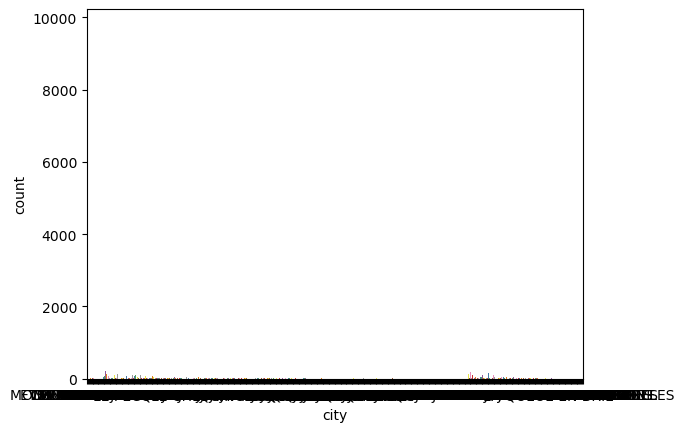

****** Brief analysis of naf2_code *****


naf2_code
6820B    676
7022Z    630
6202A    416
7112B    380
4669B    338
        ... 
1041A      1
3522Z      1
2432Z      1
2365Z      1
8690C      1
Name: count, Length: 598, dtype: int64

naf2_code
6820B    0.039924
7022Z    0.037208
6202A    0.024569
7112B    0.022443
4669B    0.019962
           ...   
1041A    0.000059
3522Z    0.000059
2432Z    0.000059
2365Z    0.000059
8690C    0.000059
Name: proportion, Length: 598, dtype: float64

'mode = 0    6820B\nName: naf2_code, dtype: object'

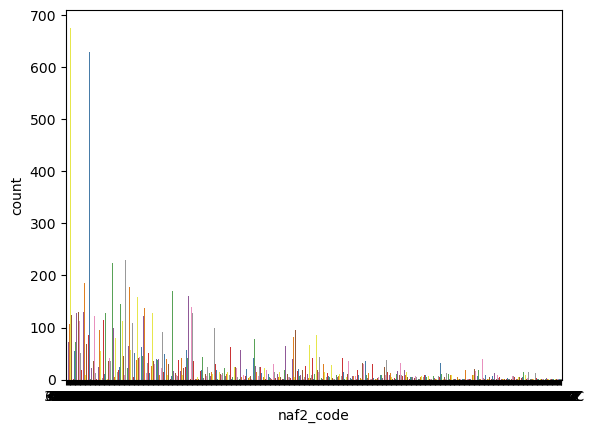

In [50]:
for col in ["post_code", "city", "naf2_code"]:
    cat_stats(df, col)  

In [ ]:
# My comments:
# Post code: too many to see something, use the department => to create?
# City: too many to see something outside Paris, 57% of the data
#naf: to simplify the categories

****** Brief Analysis of avg_workforce *****
mean= 100.0, median= 6.0, mode= -1.0
var = 1247958.15, std_dev = 1117.12, min = -1.0, max = 74900.0, range = 74901.0
quantiles : 
0.25    -1.0
0.50     6.0
0.75    44.0
Name: avg_workforce, dtype: float64


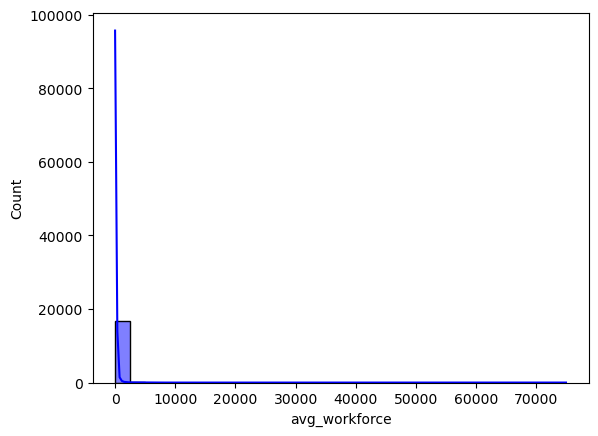

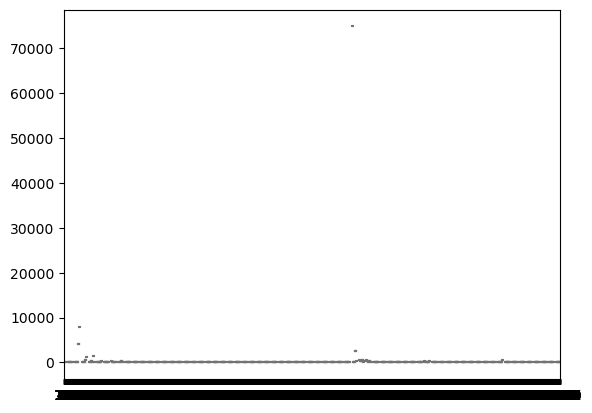

****** Brief Analysis of revenue *****
mean= 65142.0, median= 9780.403, mode= 4072.297
var = 533655991718.07, std_dev = 730517.62, min = 2800.036, max = 55501520.0, range = 55498719.964
quantiles : 
0.25     5487.98375
0.50     9780.40300
0.75    23119.62400
Name: revenue, dtype: float64


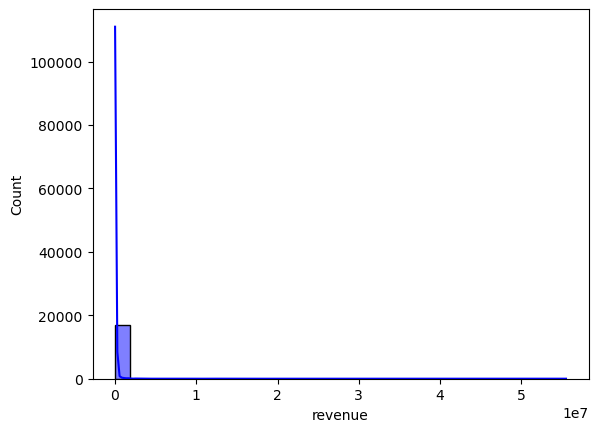

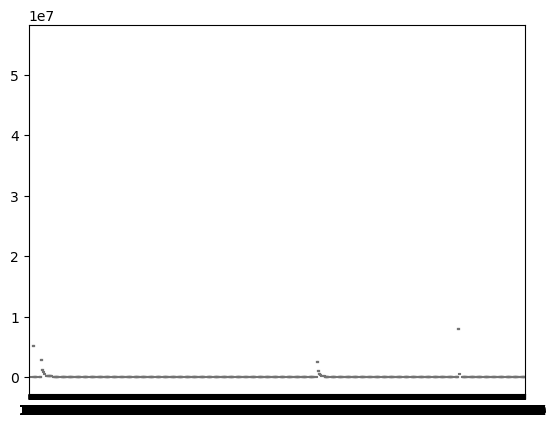

****** Brief Analysis of depre_amort *****
mean= 3118.0, median= 94.361, mode= 0.0
var = 5862279192.57, std_dev = 76565.52, min = -36602.0, max = 7717000.0, range = 7753602.0
quantiles : 
0.25     22.48400
0.50     94.36100
0.75    469.74025
Name: depre_amort, dtype: float64


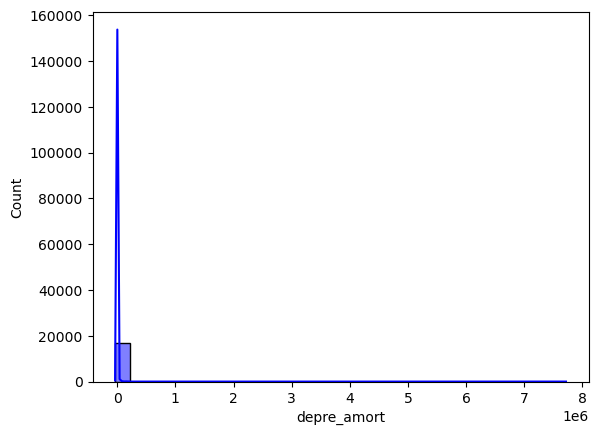

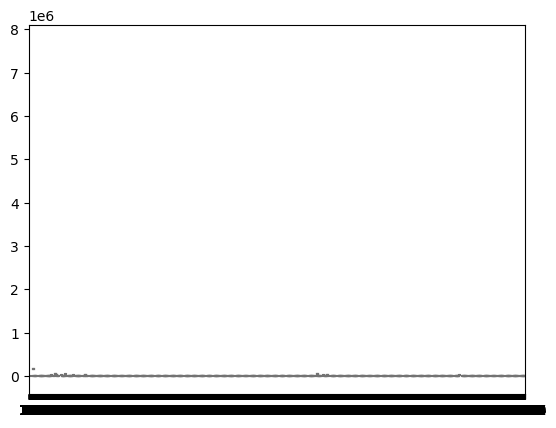

****** Brief Analysis of operating_income *****
mean= 2840.0, median= 433.7475, mode= 0.0
var = 3444470488.9, std_dev = 58689.61, min = -2075000.0, max = 3841000.0, range = 5916000.0
quantiles : 
0.25      41.08900
0.50     433.74750
0.75    1460.94425
Name: operating_income, dtype: float64


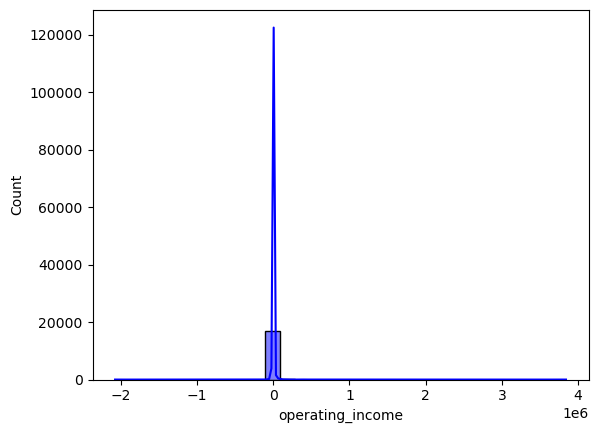

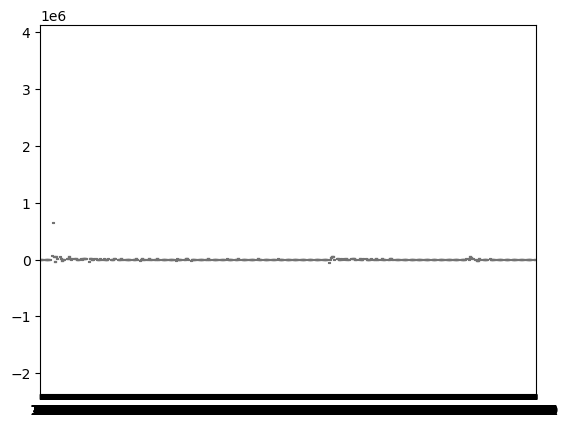

****** Brief Analysis of convert_bonds *****
mean= 2785.0, median= 0.0, mode= 0.0
var = 21142188744.45, std_dev = 145403.54, min = -1.0, max = 14043000.0, range = 14043001.0
quantiles : 
0.25    0.0
0.50    0.0
0.75    0.0
Name: convert_bonds, dtype: float64


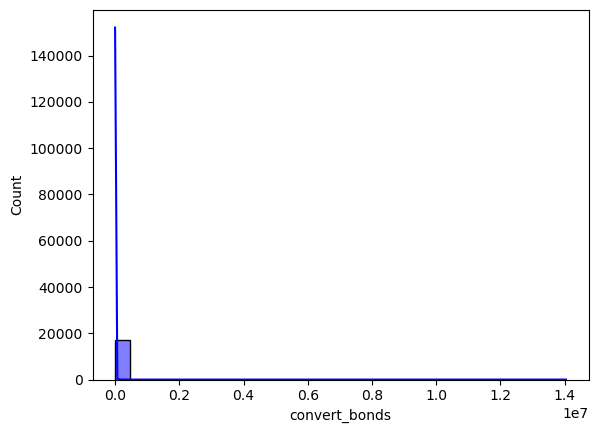

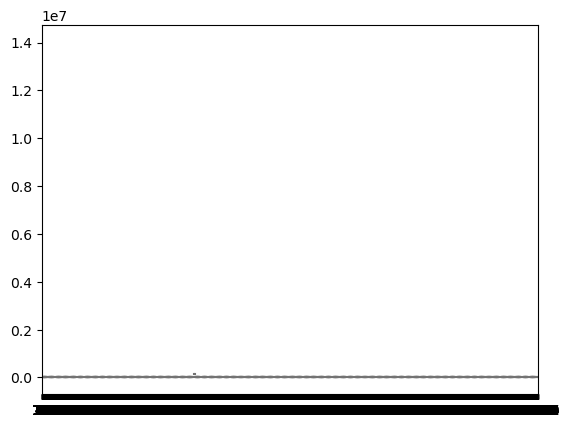

****** Brief Analysis of other_bonds *****
mean= 11195.0, median= 0.0, mode= 0.0
var = 326758815081.89, std_dev = 571628.21, min = -1.0, max = 50531000.0, range = 50531001.0
quantiles : 
0.25    0.0
0.50    0.0
0.75    0.0
Name: other_bonds, dtype: float64


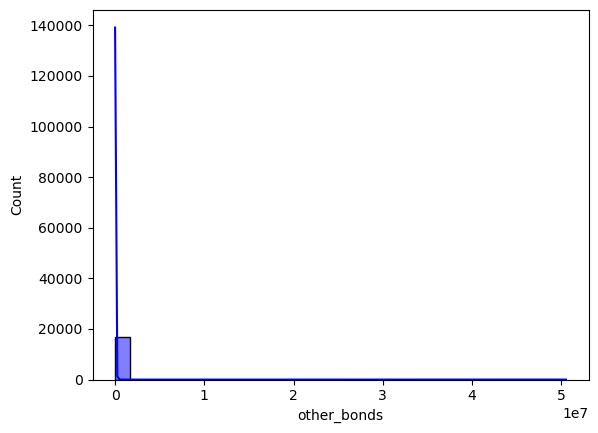

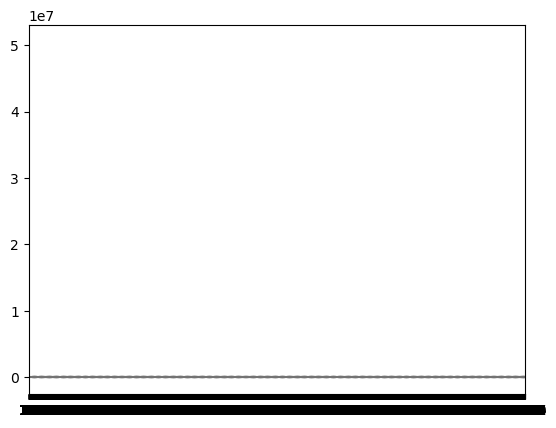

****** Brief Analysis of loans_less_1yr *****
mean= 6895.0, median= 0.0, mode= 0.0
var = 30182217767.98, std_dev = 173730.3, min = -1458.421, max = 11924847.1, range = 11926305.521
quantiles : 
0.25    0.0000
0.50    0.0000
0.75    2.4495
Name: loans_less_1yr, dtype: float64


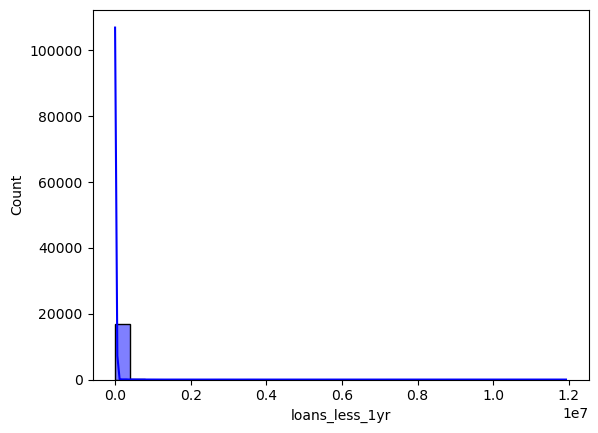

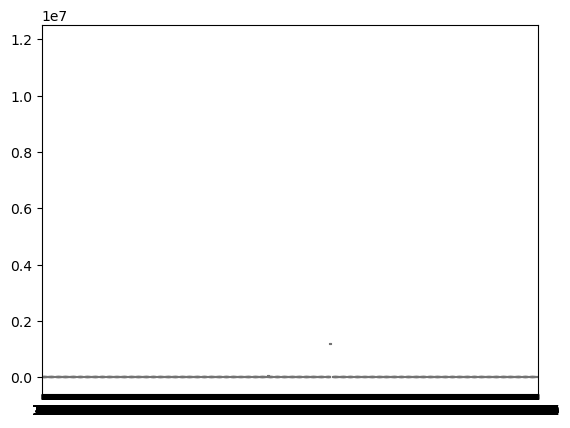

****** Brief Analysis of loans_more_1yr *****
mean= 5210.0, median= 0.0, mode= 0.0
var = 4062527846.19, std_dev = 63737.96, min = -109.459, max = 4048000.0, range = 4048109.459
quantiles : 
0.25      0.0000
0.50      0.0000
0.75    338.5865
Name: loans_more_1yr, dtype: float64


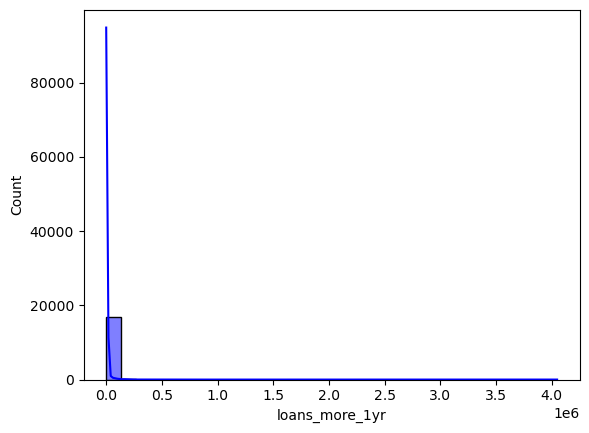

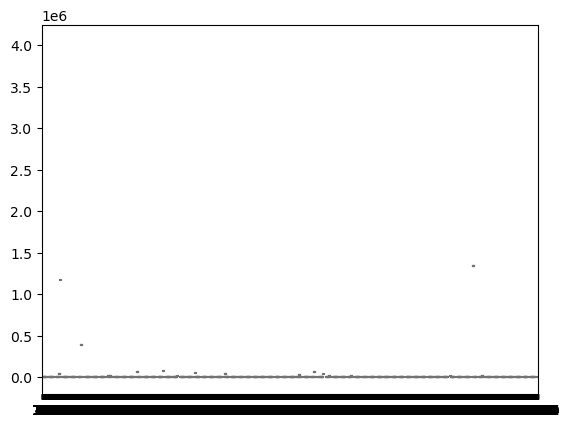

****** Brief Analysis of other_loans *****
mean= 10179.0, median= 0.0, mode= 0.0
var = 35944984808.33, std_dev = 189591.63, min = -2933.692, max = 15720564.0, range = 15723497.692
quantiles : 
0.25    0.000
0.50    0.000
0.75    8.927
Name: other_loans, dtype: float64


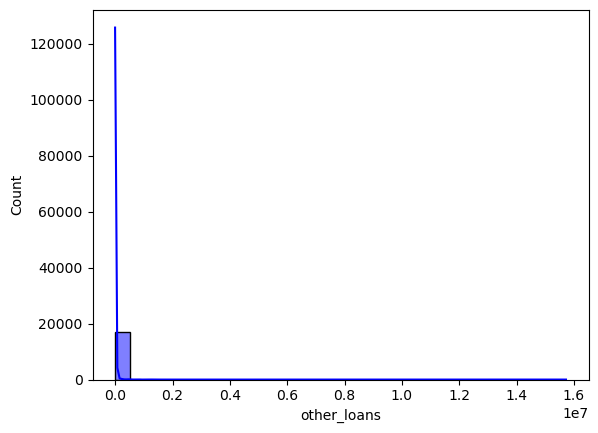

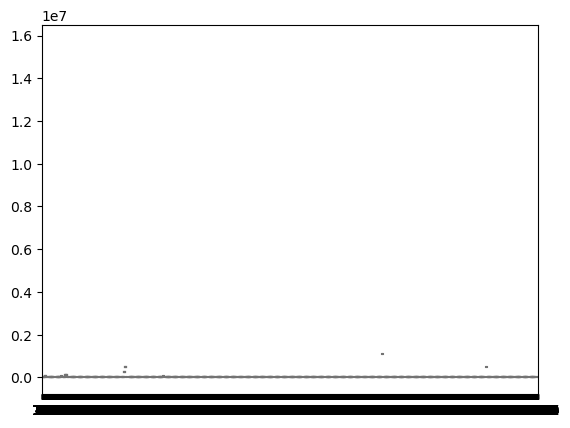

****** Brief Analysis of debts_to_group *****
mean= 5451.0, median= 0.0, mode= 0.0
var = 12286757763.94, std_dev = 110845.65, min = -13.829, max = 9948000.0, range = 9948013.829
quantiles : 
0.25      0.00000
0.50      0.00000
0.75    258.51175
Name: debts_to_group, dtype: float64


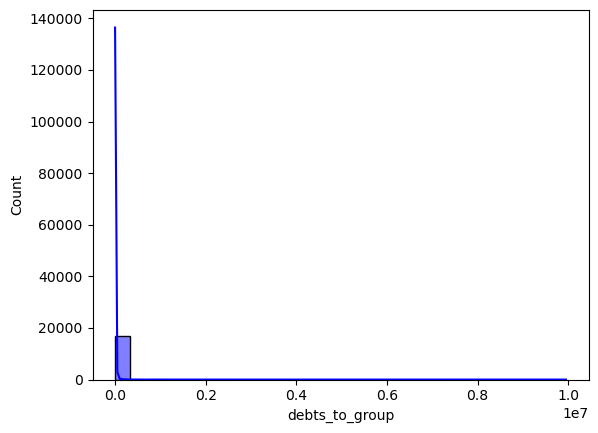

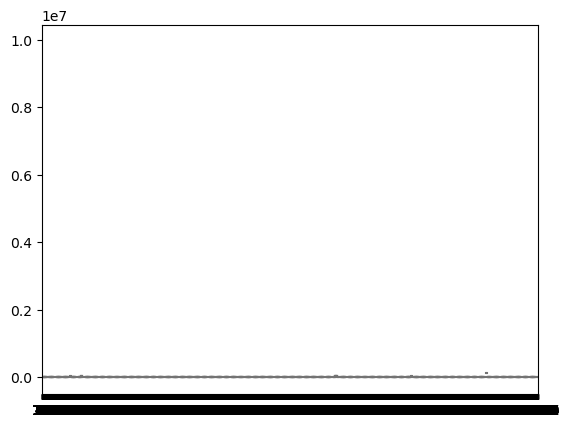

****** Brief Analysis of commit_mov_prop *****
mean= 24.0, median= 0.0, mode= 0.0
var = 1746546.76, std_dev = 1321.57, min = -1107.458, max = 165884.638, range = 166992.09600000002
quantiles : 
0.25    0.0
0.50    0.0
0.75    0.0
Name: commit_mov_prop, dtype: float64


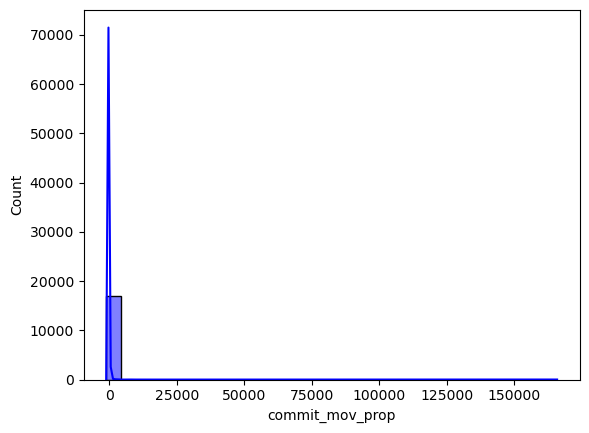

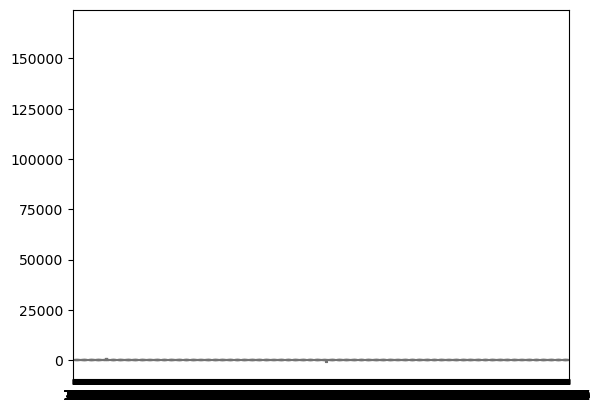

****** Brief Analysis of commit_immov_prop *****
mean= 21.0, median= 0.0, mode= 0.0
var = 917322.6, std_dev = 957.77, min = -1.0, max = 87062.49, range = 87063.49
quantiles : 
0.25    0.0
0.50    0.0
0.75    0.0
Name: commit_immov_prop, dtype: float64


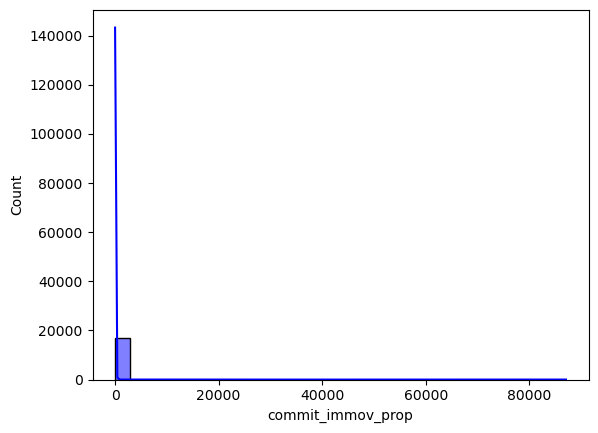

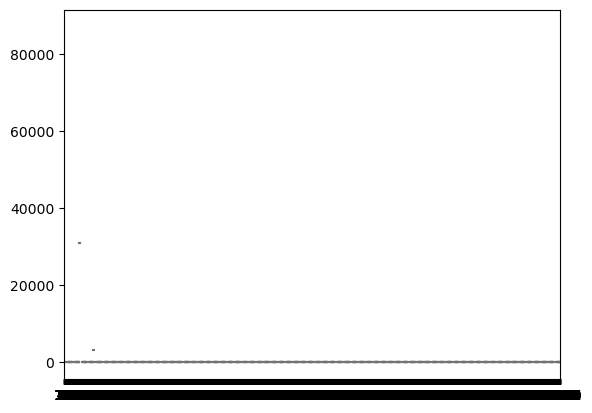

****** Brief Analysis of bills_exch *****
mean= 2.0, median= 0.0, mode= 0.0
var = 5976.67, std_dev = 77.31, min = -1.0, max = 5605.828, range = 5606.828
quantiles : 
0.25    0.0
0.50    0.0
0.75    0.0
Name: bills_exch, dtype: float64


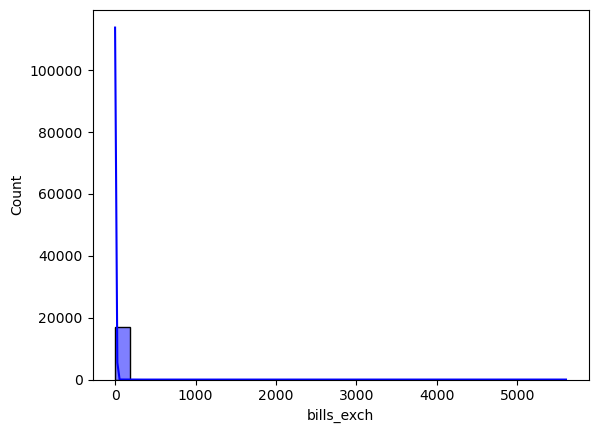

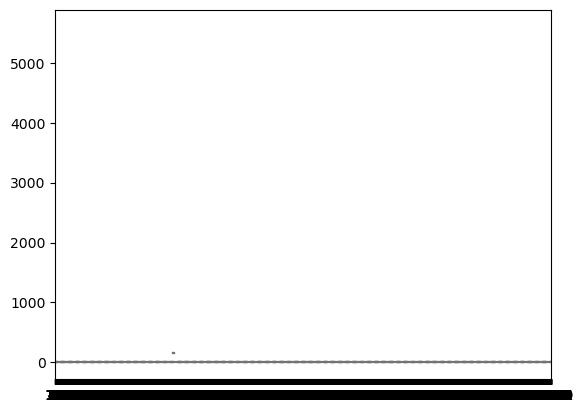

****** Brief Analysis of cash *****
mean= 7546.0, median= 771.094, mode= 0.0
var = 10418516211.72, std_dev = 102071.13, min = -736.716, max = 8397000.0, range = 8397736.716
quantiles : 
0.25     142.8975
0.50     771.0940
0.75    2519.9980
Name: cash, dtype: float64


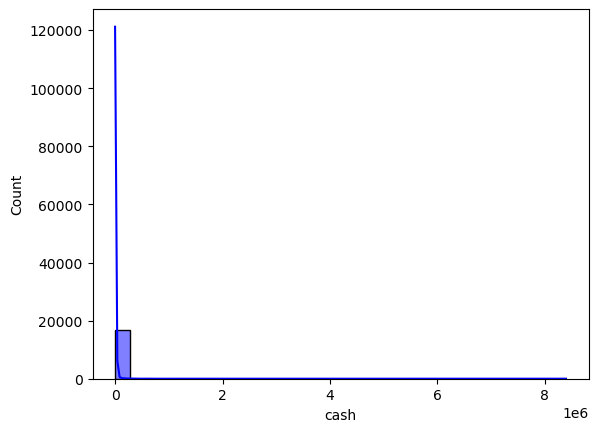

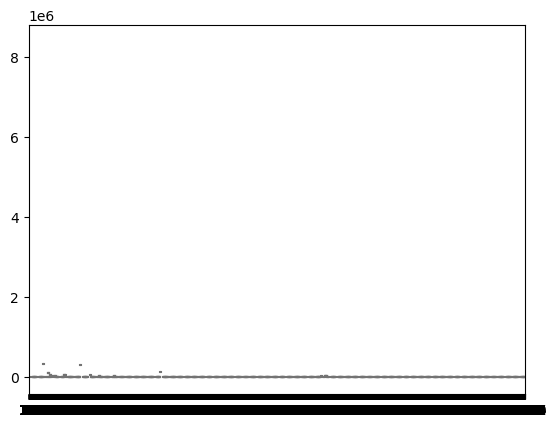

****** Brief Analysis of market_security *****
mean= 4951.0, median= 0.0, mode= 0.0
var = 22398648288.03, std_dev = 149661.78, min = -505000.0, max = 13134000.0, range = 13639000.0
quantiles : 
0.25    0.0
0.50    0.0
0.75    0.0
Name: market_security, dtype: float64


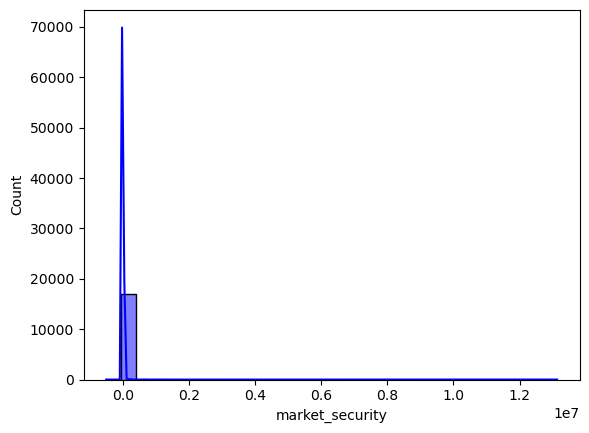

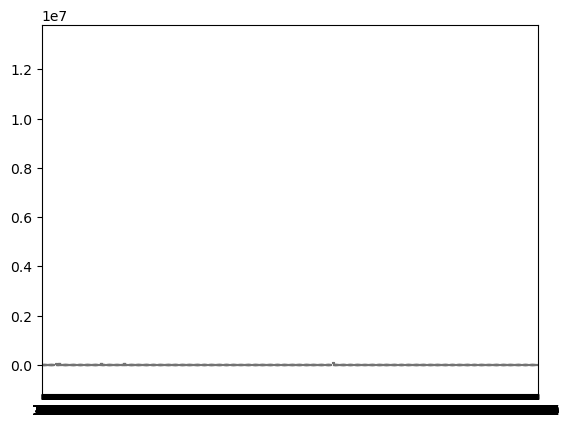

In [51]:
for col in numbers:
    num_stats(df, col)

In [37]:
# My brief comments on numbers and how to simplify the columns and compare companies

# avg_workforce: at least 25% are -1 (no data), to analyse without -1, so we get a better value. To re-run without
    # hunch that it is rigth skewed, with high outliers affecting the mean (mean > median)

# revenue : min at 2800K€ (2.8 million) max at 55,500,000K€ (55.5 billion)
    # median at 9.8 million, mean at 6.5 million, 50% of the companies are between 5.5M€ and 23M€
    # we are in thousands K# to million K€

# depreciation: negative values? to remove the negative outliers or to set to -1; then rerun the data without -1 
    # divide by revenue
    
# operating income: check if there are many -1; to remove from the analysis, the others make sense
    # divide by revenue
    
# convert_bonds, other bonds: 
    # check if there are many -1; many at 0 to remove from the analysis, the others make sense
# loans less than 1 y, more than 1 y, other loans: 
    # negative values? to remove the negative outliers or to set to -1; then rerun the data without -1 
# to add all the borrowed money: 
    # 'borrowed' = "convert_bonds", "other_bonds", "loans_less_1yr", "loans_more_1yr", "other_loans", "debts_to_group"
    # divide by revenue

# cash: check if there are many -1; to remove from the analysis, the others make sense
    # divide by revenue
    
# "commit_mov_prop", "commit_immov_prop": 
    # without the -1?: "commit_mov_prop", "commit_immov_prop" as 'rentals'
    # divide by revenue

# Not sure to understand: "bills_exch"=> to remove

# "market_security" => to rename 'securities_investment'
    # divide by revenue
    
numbers = ["avg_workforce",  "revenue", "depre_amort", "operating_income", "convert_bonds", "other_bonds", "loans_less_1yr", 
           "loans_more_1yr", "other_loans", "debts_to_group", "commit_mov_prop", "commit_immov_prop", "bills_exch", "cash",
           "market_security"]

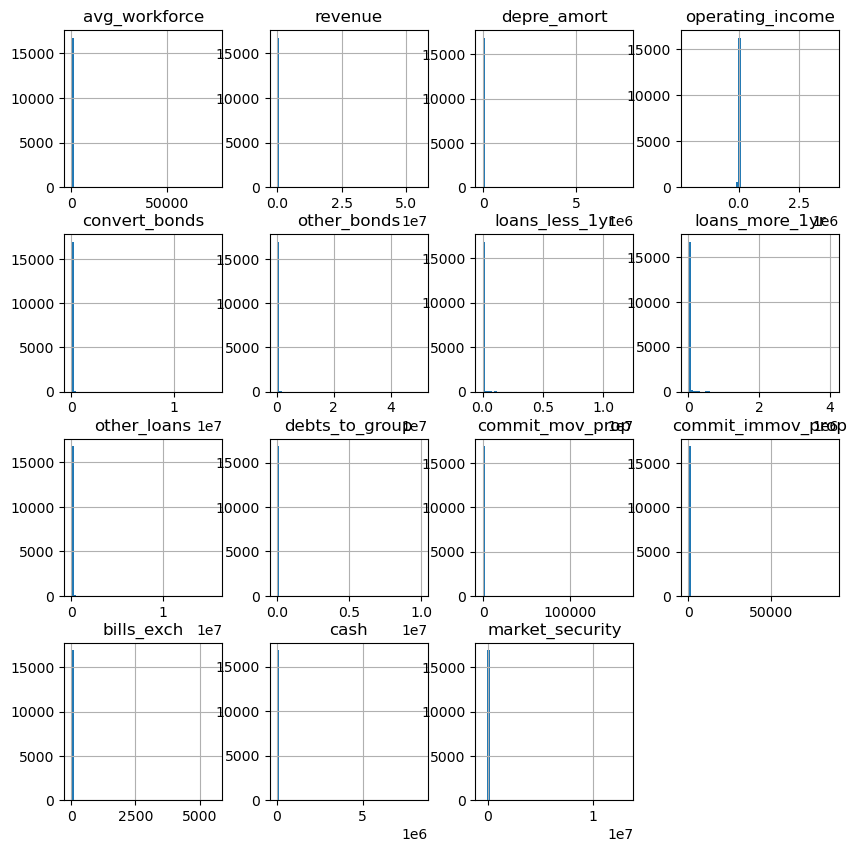

In [52]:
# Creating histograms for each numerical column in 'df1 numerical'
df[numbers].hist(figsize=(10, 10), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

In [41]:
# avg_workforce: at least 25% are -1 (no data), to analyse without -1, so we get a better value. To re-run without
# hunch that it is rigth skewed, with high outliers affecting the mean (mean > median)

# to review the workforce without -1
mask = df['avg_workforce'] != -1

df['avg_workforce'].value_counts()

avg_workforce
-1.0      7807
 7.0       166
 12.0      162
 19.0      159
 9.0       159
          ... 
 557.0       1
 547.0       1
 421.0       1
 392.0       1
 387.0       1
Name: count, Length: 847, dtype: int64

****** Brief Analysis of avg_workforce *****
mean= 186.0, median= 40.0, mode= 7.0
var = 2299571.78, std_dev = 1516.43, min = 1.0, max = 74900.0, range = 74899.0
quantiles : 
0.25     18.0
0.50     40.0
0.75    100.0
Name: avg_workforce, dtype: float64


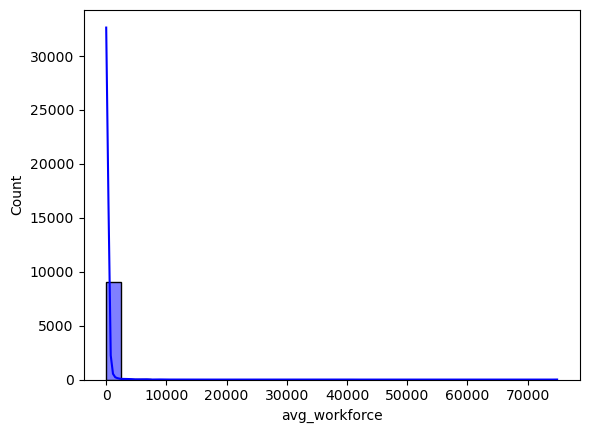

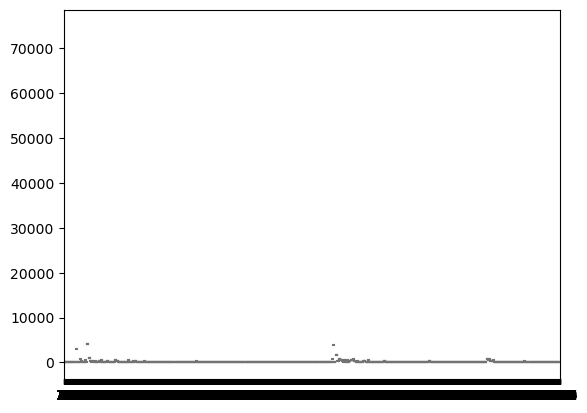

In [54]:
num_stats(df[mask], 'avg_workforce')

In [42]:
#creating a dataframe only with avg_workforce not -1, and creating bins to visualise
mask = df['avg_workforce'] != -1
df_wforce = df[mask]
df_wforce['size_group'] = pd.qcut(df_wforce['avg_workforce'], q=10, labels=["q1","q2","q3","q4","q5","q6","q7","q8","q9","q10"])

C:\Users\Javier\AppData\Local\Temp\ipykernel_15928\2903129520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wforce['size_group'] = pd.qcut(df_wforce['avg_workforce'], q=10, labels=["q1","q2","q3","q4","q5","q6","q7","q8","q9","q10"])


In [43]:
# creating the column in df the main dataframe, and not filling in the empty values (could do with -1 in the future)
test = df_wforce[["siren", "size_group"]]
df = pd.merge(df, test, on= "siren", how = 'left')
#df.drop(["size_group_x", "size_group_y", "size_group"], axis=1, inplace=True)
df.columns

Index(['name', 'siren', 'post_code', 'city', 'naf2_code', 'naf2_activity',
       'avg_workforce', 'revenue', 'depre_amort', 'operating_income',
       'convert_bonds', 'other_bonds', 'loans_less_1yr', 'loans_more_1yr',
       'other_loans', 'debts_to_group', 'commit_mov_prop', 'commit_immov_prop',
       'bills_exch', 'cash', 'market_security', 'ceo', 'natural_or_legal',
       'date_of_birth', 'group_head', 'shareholder', 'shareholder_1stname',
       'group_head_1stname', 'group_head_share', 'shareholder_share',
       'reference_shareholder', 'reference_shareholder_1stname',
       'reference_shareholder_share', 'size_group'],
      dtype='object')

In [44]:
df.shape

(16932, 34)

In [45]:
#df["size_group"].fillna(-1)
df["size_group"].value_counts(dropna = False)

size_group
NaN    7807
q1      991
q4      971
q10     913
q9      912
q3      906
q8      906
q7      896
q5      894
q6      874
q2      862
Name: count, dtype: int64

In [46]:
df_wforce['size_group'].value_counts()

size_group
q1     991
q4     971
q10    913
q9     912
q3     906
q8     906
q7     896
q5     894
q6     874
q2     862
Name: count, dtype: int64

****** Brief analysis of size_group *****


size_group
q1     991
q4     971
q10    913
q9     912
q3     906
q8     906
q7     896
q5     894
q6     874
q2     862
Name: count, dtype: int64

size_group
q1     0.108603
q4     0.106411
q10    0.100055
q9     0.099945
q3     0.099288
q8     0.099288
q7     0.098192
q5     0.097973
q6     0.095781
q2     0.094466
Name: proportion, dtype: float64

"mode = 0    q1\nName: size_group, dtype: category\nCategories (10, object): ['q1' < 'q2' < 'q3' < 'q4' ... 'q7' < 'q8' < 'q9' < 'q10']"

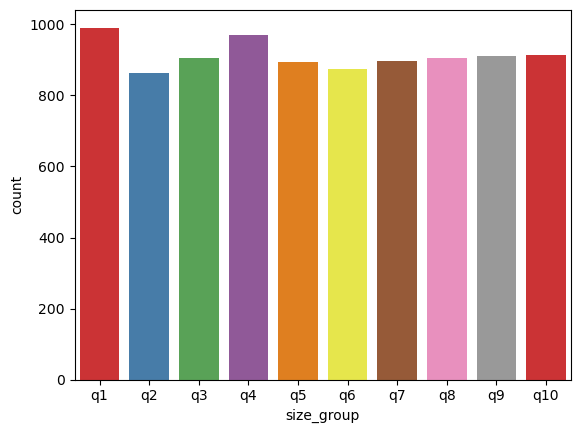

In [47]:
cat_stats(df_wforce, 'size_group')

****** Brief Analysis of avg_workforce *****
mean= 54.0, median= 34.0, mode= 7.0
var = 3063.8, std_dev = 55.35, min = 1.0, max = 268.0, range = 267.0
quantiles : 
0.25    16.00
0.50    34.00
0.75    69.25
Name: avg_workforce, dtype: float64


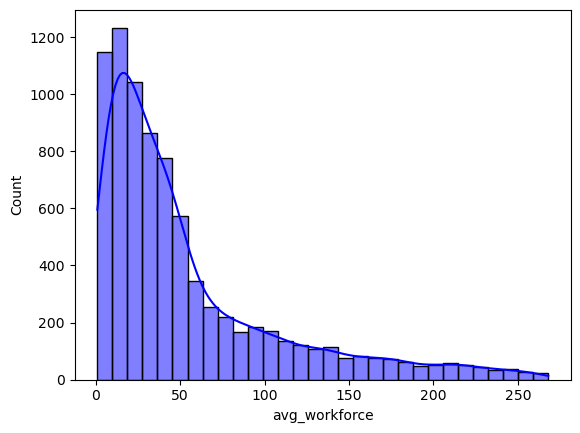

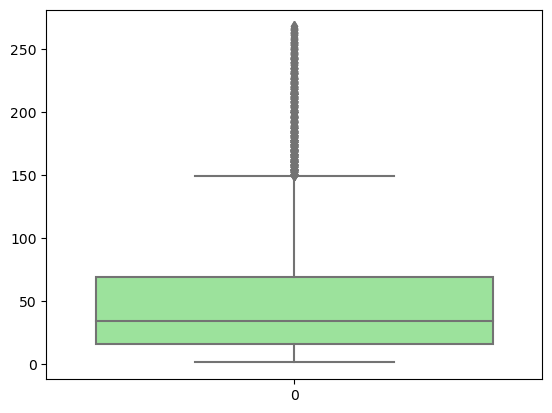

In [67]:
num_stats(df_wforce[df_wforce['avg_workforce'] < 268.6], 'avg_workforce') # 268.8 was the bottom of q10


In [48]:
# Learnings
# if we remove the top 10% (>286 employees), the median is at 34 and the average at 54 employees, with still a sizeable number
# of outliers above 150 employees. The distribution is right skewed

# NEED TO CREATE A column in df with this info and a '-1' category together with the 10 bins


In [49]:
# revenue : min at 2800K€ (2.8 million) max at 55,500,000K€ (55.5 billion)
    # median at 9.8 million, mean at 6.5 million, 50% of the companies are between 5.5M€ and 23M€
    # we are in thousands K# to million K€
df['size_revenue'] = pd.qcut(df['revenue'], q=10)
df['size_revenue'].value_counts()

size_revenue
(2800.035, 3663.621]       1694
(68136.419, 55501520.0]    1694
(3663.621, 4999.859]       1693
(4999.859, 6056.87]        1693
(6056.87, 7591.493]        1693
(7591.493, 9780.403]       1693
(9780.403, 13051.678]      1693
(13051.678, 18574.799]     1693
(18574.799, 30105.034]     1693
(30105.034, 68136.419]     1693
Name: count, dtype: int64

****** Brief Analysis of revenue *****
mean= 13701.0, median= 8546.2235, mode= 4072.297
var = 169951108.78, std_dev = 13036.53, min = 2800.036, max = 68102.193, range = 65302.157
quantiles : 
0.25     5224.1950
0.50     8546.2235
0.75    16919.4180
Name: revenue, dtype: float64


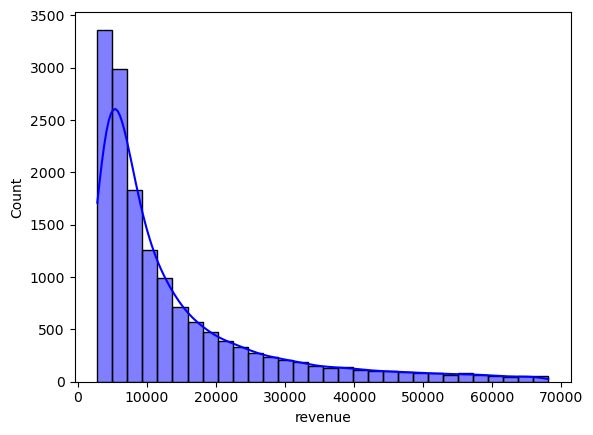

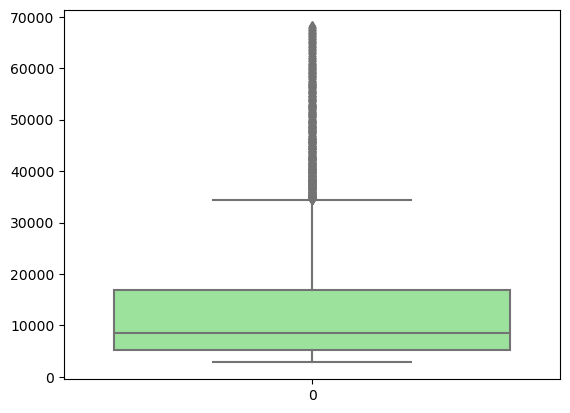

In [71]:
num_stats(df[df['revenue'] < 68136.419], 'revenue')

In [50]:
# depreciation: negative values? to remove the negative outliers or to set to -1; then rerun the data without -1 
    # divide by revenue
    
df['dep_percent'] = df['depre_amort'].apply(lambda x : -1 if x < 0 else x)
df['dep_percent'] = df['dep_percent']/df['revenue']
df['dep_percent'] = df['dep_percent'].apply(lambda x : -1 if x < 0 else x)


In [51]:
# to review the depreciation without -1 and 0
mask = df['dep_percent'] != -1

df['dep_percent'].value_counts()

dep_percent
 0.000000    1010
-1.000000      16
 0.001724       4
 0.000671       3
 0.011265       3
             ... 
 0.021777       1
 0.045728       1
 0.032394       1
 0.044832       1
 0.002171       1
Name: count, Length: 15894, dtype: int64

****** Brief Analysis of dep_percent *****
mean= 0.0, median= 0.009054798826044541, mode= 0.0017243339569780888
var = 0.03, std_dev = 0.16, min = 1.5659097685209545e-07, max = 6.697967830089467, range = 6.69796767349849
quantiles : 
0.25    0.003052
0.50    0.009055
0.75    0.029936
Name: dep_percent, dtype: float64


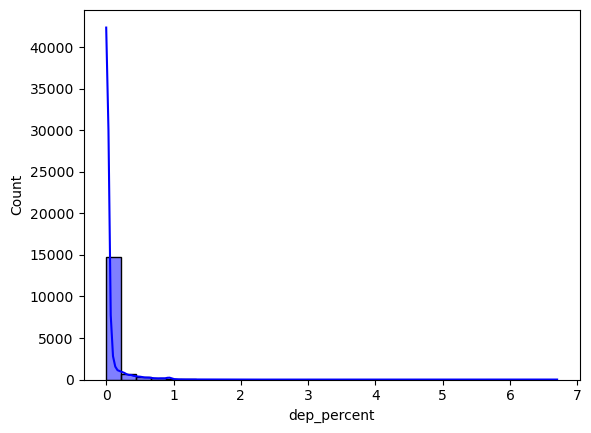

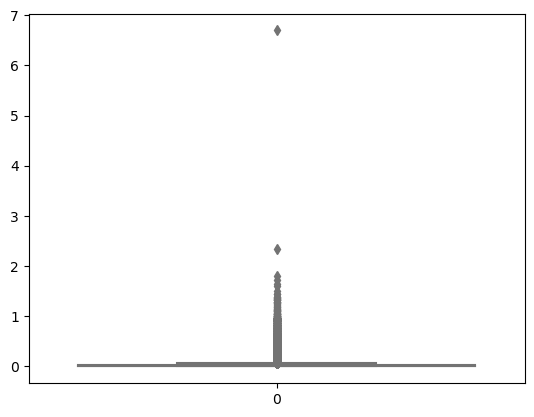

In [47]:
num_stats(df[df['dep_percent'] > 0], 'dep_percent') # analysis without 0 and negative

In [52]:
# convert_bonds, other bonds: 
    # check if there are many -1; many at 0 to remove from the analysis, the others make sense
# loans less than 1 y, more than 1 y, other loans: 
    # negative values? to remove the negative outliers or to set to -1; then rerun the data without -1 
# to add all the borrowed money: 
    # 'borrowed' = "convert_bonds", "other_bonds", "loans_less_1yr", "loans_more_1yr", "other_loans", "debts_to_group"
    # divide by revenue

df["borrowed"] = (df["convert_bonds"]+df["other_bonds"]+df["loans_less_1yr"]+df["loans_more_1yr"]+ df["other_loans"]+df["debts_to_group"])/df["revenue"]
df["borrowed"].value_counts()
                                                                                                                                              

borrowed
 0.000000    3830
-0.001473       4
 0.331921       3
 6.226938       2
 0.002699       2
             ... 
 0.002699       1
 7.040035       1
 0.246212       1
 0.227690       1
 0.018360       1
Name: count, Length: 13091, dtype: int64

In [53]:
# operating income: check if there are many -1; to remove from the analysis, the others make sense
    # divide by revenue

df['op_inc_percent'] = df['operating_income']/df['revenue']

****** Brief Analysis of op_inc_percent *****
mean= 0.0, median= 0.05891457062075256, mode= 0.043254458110496365
var = 0.02, std_dev = 0.14, min = 1.1173424055577504e-07, max = 0.9999999571440742, range = 0.9999998454098337
quantiles : 
0.25    0.026215
0.50    0.058915
0.75    0.132505
Name: op_inc_percent, dtype: float64


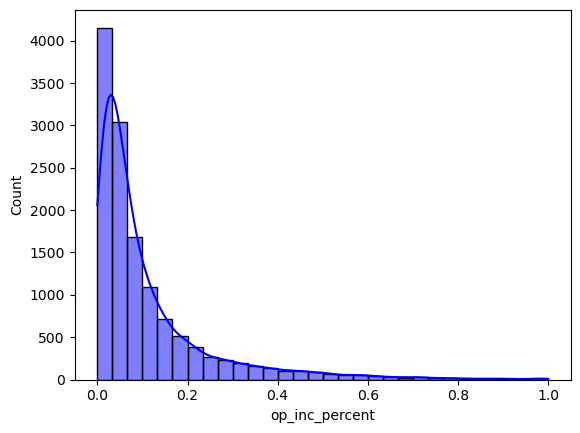

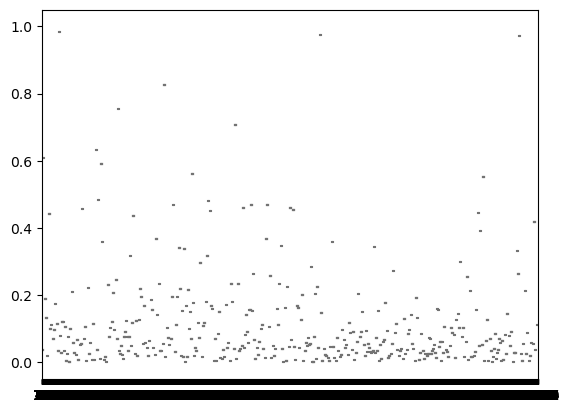

In [86]:
# removing negative and 0
# IF time to look removing the top 10%
num_stats(df[(df['op_inc_percent'] > 0)& (df['op_inc_percent'] < 1)],'op_inc_percent')

In [50]:
# operating income, without strange values negative, 0 and above 1 are at 5% median the average is strangely @ 0

In [54]:
# cash: check if there are many -1; to remove from the analysis, the others make sense
    # divide by revenue
df.cash.value_counts()

cash
 0.000         755
-1.000         669
 10.000          5
 0.005           5
 12.143          4
              ... 
 920.554         1
 1084.074        1
 145865.000      1
 2989.249        1
 425.070         1
Name: count, Length: 15388, dtype: int64

In [55]:
# If TIME, to check the spread of cash without -1 and top 10%
mask = df['cash'] != -1

# converting cash in percentage

df["cash_percent"] = df["cash"]/df["revenue"]
df['cash_percent'] = df['cash_percent'].apply(lambda x : -1 if x < 0 else x)

In [56]:
# "commit_mov_prop", "commit_immov_prop": 
    # without the -1?: "commit_mov_prop", "commit_immov_prop" as 'rentals'
    # divide by revenue

df['rentals']= (df["commit_mov_prop"] + df["commit_immov_prop"])/df["revenue"]

In [57]:
# "market_security"/revenue => to rename 'secure_investment_percent'
df["secure_investment_percent"] = df["market_security"]/df["revenue"]

In [58]:
# Creating the revenue_10m column (revenue in 10th of millions)
df["revenue_10m"] = df["revenue"]/10000

In [56]:
# Not sure to understand: "bills_exch"=> to remove
# Create 3 dataframes, using siren, names as primary keys if necessary
    # general = ["name", "siren", "post_code", "city", "naf2_code", "naf2_activity"]
    # numbers_all= ["name", "siren","avg_workforce",  "revenue", "depre_amort", "operating_income", "convert_bonds", "other_bonds", "loans_less_1yr", 
    #       "loans_more_1yr", "other_loans", "debts_to_group", "commit_mov_prop", "commit_immov_prop", "bills_exch", "cash",
    #       "market_security"]
    # numbers_light =["name", "siren","avg_workforce","size_group","revenue_10m","op_inc_percent","dep_percent","borrowed", 'rentals',
    #             'cash_percent', "secure_investment_percent"]
    # management = ["ceo", "natural_or_legal", "date_of_birth", "group_head", "shareholder", "shareholder_1stname", 
    #          "group_head_1stname", "group_head_share","shareholder_share", "reference_shareholder", 
    #          "reference_shareholder_1stname", "reference_shareholder_share"]

In [59]:
general = ["name", "siren", "post_code", "city", "naf2_code", "naf2_activity"]
numbers_all = ["name", "siren","avg_workforce",  "revenue", "depre_amort", "operating_income", "convert_bonds", "other_bonds", "loans_less_1yr", 
           "loans_more_1yr", "other_loans", "debts_to_group", "commit_mov_prop", "commit_immov_prop", "bills_exch", "cash",
           "market_security"]
management = ["name", "siren","ceo", "natural_or_legal", "date_of_birth", "group_head", "shareholder", "shareholder_1stname", 
              "group_head_1stname", "group_head_share","shareholder_share", "reference_shareholder", 
              "reference_shareholder_1stname", "reference_shareholder_share"]
numbers_light =["name", "siren","naf2_code","avg_workforce","size_group","revenue_10m","op_inc_percent","dep_percent","borrowed", 
                'rentals', 'cash_percent', "secure_investment_percent"]

In [60]:
df_general = df[general]
df_numbers_all = df[numbers_all]
df_management = df[management]
df_numbers_light = df[numbers_light]

In [61]:
df_general = df_general.rename(columns={'name': 'denomination'})
df_numbers_all = df_numbers_all.rename(columns={'name': 'denomination'})
df_management = df_management.rename(columns={'name': 'denomination'})
df_numbers_light = df_numbers_light.rename(columns={'name': 'denomination'})

In [62]:
df_general.shape, df_numbers_all.shape, df_management.shape, df_numbers_light.shape

((16932, 6), (16932, 17), (16932, 14), (16932, 12))

In [114]:
df_numbers_light.revenue_10m.min()

0.2800036

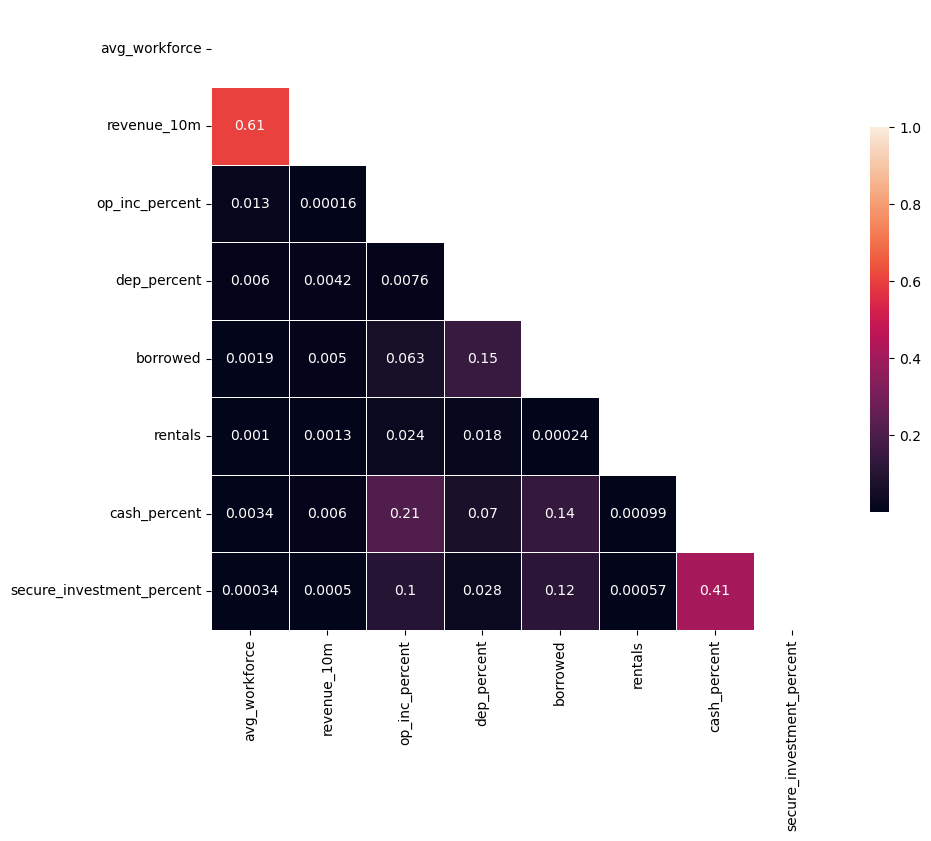

In [64]:
# Correlation heatmapt for the light dataframe, removing siren, name, naf and workforce
df_new = df_numbers_light[["avg_workforce","revenue_10m","op_inc_percent","dep_percent","borrowed", 
                'rentals', 'cash_percent', "secure_investment_percent"]]

corr=np.abs(df_new.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

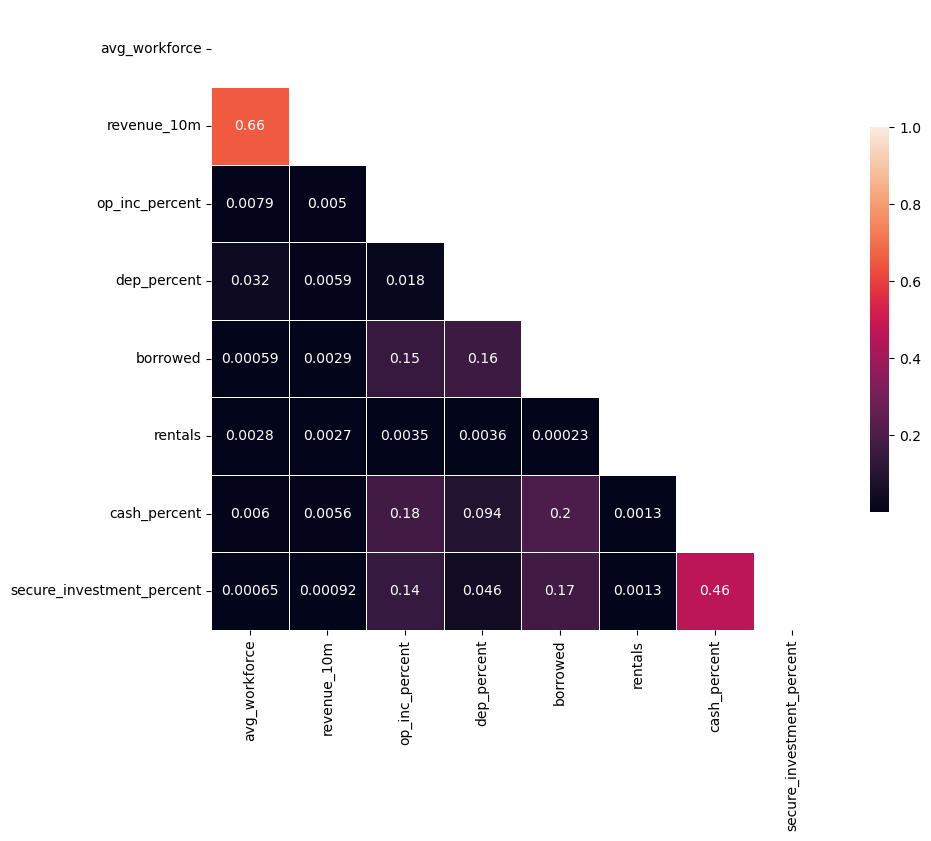

In [65]:
# Correlation heatmapt for the light dataframe, removing siren, name, naf and workforce categories and -1 values for personnel
df_new_2 = df_new[df_numbers_light["avg_workforce"]>0]

corr=np.abs(df_new_2.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [66]:
#numbers_light =["name", "siren","naf2_code","avg_workforce","size_group","revenue_10m","op_inc_percent","dep_percent","borrowed", 
#                'rentals', 'cash_percent', "secure_investment_percent"]

In [78]:
#Creating a function to generate a data frame with the average in 2022 of the financials for two codes
def average_2022(code_ape, code_ape_2, df):
    mask = df['naf2_code'] == code_ape
    mask_2 = df['naf2_code'] == code_ape_2
    
    column_list = ["avg_workforce", "revenue_10m","op_inc_percent","dep_percent","borrowed", 'rentals', 'cash_percent', "secure_investment_percent"]
    list_1 = []
    list_2 = []
    list_3 = []
    
    for col in column_list:
        list_1.append(df[mask][col].mean())
        list_2.append(df[mask_2][col].mean())
        list_3.append(df[col].mean())
    
    data = {'group': column_list, 
            code_ape: list_1,
            code_ape_2: list_2,
           'all_codes': list_3}
    return pd.DataFrame(data)


In [83]:
economics = average_2022('6202A','7022Z', df_numbers_light).T
economics.columns = ["avg_workforce", "revenue_10m","op_inc_percent","dep_percent","borrowed", 'rentals', 'cash_percent', "secure_investment_percent"]
economics = economics.drop('group', axis = 0)
economics

,avg_workforce,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent
6202A,136.401442,3.45531,0.044615,0.020226,0.142174,0.000069,0.174327,0.026278
7022Z,34.755556,1.761093,0.061773,0.017299,1.028321,0.000326,0.252165,0.107988
all_codes,100.037916,6.514186,0.04298,0.05465,1.309982,0.00391,0.241499,0.089677


In [3]:
#Export to my SQL
# Name of database: 'match_project'

from sqlalchemy import create_engine 
import pymysql.cursors
import os
# import getpass
import urllib.parse


urllib.parse.quote_plus('!') # parse to 'remove-change' the weird characters in our password, here it is '!'
urllib.parse.quote_plus('é')
pw_raw = 'Alsimar10' # os.getenv('mysql_andy') # I had to put my.sql password
pw = urllib.parse.quote_plus(pw_raw)

#engine = sqlalchemy.create_engine(f"mysql://{username}:{password}@{host}:{port}")

connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/' # we connect to our computer, if we connect to a company
                     # this is the driver                             # data base, then we need an IP address
engine = create_engine(connection_string)

with engine.connect() as conn:                                   # we are creating an alias
    conn.execute(f"CREATE DATABASE IF NOT EXISTS match_project") # we are creating a new name of database "match_project"

In [67]:
# Exporting the tables to Mysql
#df_general.to_sql('general',engine, 'match_project', if_exists='replace', index=False) # 'pushing' the data
#df_numbers_all.to_sql('numbers_all',engine, 'match_project', if_exists='replace', index=False) # 'pushing' the data
#df_management.to_sql('management',engine, 'match_project', if_exists='replace', index=False) # 'pushing' the data
#df_numbers_light.to_sql('numbers_light',engine, 'match_project', if_exists='replace', index=False) # 'pushing' the data


16932

In [71]:
# export to CSV
#df_general.to_csv("general.csv")
#df_numbers_all.to_csv("numbers_all.csv")
#df_management.to_csv("management.csv")
#df_numbers_light.to_csv("numbers_light.csv")

In [4]:
# import the data from mysql to change the 'name' column into 'denomination'... as it is not usable on mysql

#df_general = pd.read_sql_table('general',engine,'match_project')
#df_numbers_all = pd.read_sql_table('numbers_all',engine,'match_project')
#df_management = pd.read_sql_table('management',engine,'match_project')
#df_numbers_light = pd.read_sql_table('numbers_light',engine,'match_project')

In [84]:
df_numbers_light.head(10)

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent
0,ELECTRICITE DE FRANCE,552081317,3511Z,62035.0,q10,5300.100000,0.048433,0.082319,1.084847,0.0,0.158431,0.247807
1,SYXPERIANE,497541599,6202A,53.0,q7,0.791771,0.239463,0.004650,0.041933,0.0,0.175963,0.176819
2,GD REAUMUR,814116612,7010Z,153.0,q9,0.791110,0.042766,0.000000,0.098574,0.0,0.096621,0.000000
3,LES TRESORS DE GAMBRINUS,439430364,4634Z,-1.0,NaN,0.790986,0.030697,0.009250,0.012145,0.0,0.045603,0.000000
4,CLIM DENFERT - BOURQUIN,349349282,4322B,-1.0,NaN,0.790775,0.013730,0.011099,0.196247,0.0,0.058825,0.000000
5,ACTIMAGE CONSULTING,479557894,6202A,-1.0,NaN,0.790767,0.033246,0.018506,0.108324,0.0,0.814422,0.000000
6,ENERGIE DU PORCIEN,493444426,3511Z,-1.0,NaN,0.790725,0.536205,0.199433,4.718938,0.0,0.010204,0.000000
7,SNC ALTA CRP AUBERGENVILLE,451226328,6820B,-1.0,NaN,0.790701,0.360762,0.253922,5.869908,0.0,0.000239,0.000000
8,DOM'HESTIA PROMOTION,538048265,4110A,-1.0,NaN,0.790439,0.044317,0.000000,1.074567,0.0,-1.000000,-0.000127
9,BISIMPEX INT'L,414946822,4649Z,-1.0,NaN,0.790353,0.024091,0.000118,0.000000,0.0,0.031786,0.000000


In [9]:
# ************************** Starting to play with models, need to import the files from my_sql to avoid running all above

In [8]:
#Quick check for duplicates in case of
df_general.duplicated().sum(), df_numbers_all.duplicated().sum(), df_management.duplicated().sum(), df_numbers_light.duplicated().sum()

(0, 0, 0, 0)

In [95]:
# selecting 10 companies to check, 1 per decile excluding the -1
# Defining a mapping from string values to numerical values representing deciles
decile_map = {'q1': 1, 'q2': 2, 'q3': 3, 'q4': 4, 'q5': 5, 'q6': 6, 'q7': 7, 'q8': 8, 'q9': 9, 'q10': 10}
df_numbers_light_for_random = df_numbers_light.copy()

# Mapping the string values to numerical values
df_numbers_light_for_random['decile'] = df_numbers_light_for_random['size_group'].map(decile_map)

def select_random_row(group):
    """function to select one random row from each group"""
    return group.sample(n=1, random_state = 11)

# Grouping by decile and apply the function to select one random row from each group
random_rows = df_numbers_light_for_random.groupby('decile').apply(select_random_row)

random_rows


,,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,decile
decile,,,,,,,,,,,,,,
1,7230,LINKSURY,482533320,4642Z,8.0,q1,0.430558,0.011855,0.005602,0.045867,0.0,0.009909,0.002090,1
2,3416,RGREEN INVEST,797827995,6630Z,13.0,q2,1.330909,0.502561,0.003922,0.003363,0.0,0.528887,0.000000,2
3,16135,SOLPOM,798477469,4631Z,15.0,q3,0.961835,0.044027,0.003158,0.019386,0.0,0.001101,0.000000,3
4,13364,EUROLEC 2000,449609981,4321A,27.0,q4,0.818198,0.019027,0.001627,0.285675,0.0,0.121547,0.000000,4
5,7765,ECOLE DE CONDE,423349125,8542Z,32.0,q5,0.392927,0.284484,0.049924,0.156961,0.0,0.045546,0.285244,5
6,15101,SOCIETE D'ETUDES ET DE REALISATION D'INSTALLAT...,308276088,4321A,48.0,q6,4.221433,0.147865,0.002838,0.032294,0.0,0.064802,0.000000,6
7,11332,CHECKPOINT SYSTEMS FRANCE SAS,321692774,4669C,71.0,q7,2.592301,0.066881,0.001436,0.000000,0.0,0.049864,0.000000,7
8,15584,SGS INTERNATIONAL CERTIFICATION SERVICE,403293103,7120B,120.0,q8,1.774691,0.007527,0.000333,0.222294,0.0,0.000010,0.000000,8
9,1368,ZARA HOME FRANCE,488000969,4771Z,266.0,q9,5.218484,0.087160,0.083767,0.023468,0.0,0.011892,0.000000,9


In [ ]:
# creating 10 '1 line dataframes' for each to check the model



In [84]:
# Reminder
# df_new = df_numbers_light[["avg_workforce","revenue_10m","op_inc_percent","dep_percent","borrowed",'rentals', 'cash_percent', "secure_investment_percent"]]
# df_new_2 = df_new[df_numbers_light["avg_workforce"]>0]
df_numbers_light_bis = df_numbers_light[df_numbers_light["avg_workforce"]>0]

In [85]:
# 1st model:  note avg_workforce has only >0 values, not scaled, KMeans with 200 clusters
# ['avg_workforce', 'revenue_10m', 'op_inc_percent', 'dep_percent', 'borrowed', 'rentals', 'cash_percent', 'secure_investment_percent']

In [86]:
features_model_1_on = ['avg_workforce', 'revenue_10m', 'op_inc_percent', 'dep_percent', 'borrowed', 'rentals', 'cash_percent', 
                       'secure_investment_percent']
features_df_1 = df_new_2

In [87]:
features_df_1.shape

(9125, 8)

In [20]:
km200 = KMeans(200)
# scaler = MinMaxScaler() # creating the 'scaler'
# scaled_features = scaler.fit_transform(features_df) # to fit the scale on our features
# km200.fit(scaled_features) # if I was using the scaled model
km200.fit(features_df_1)

C:\Users\Javier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=200)

C:\Users\Javier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


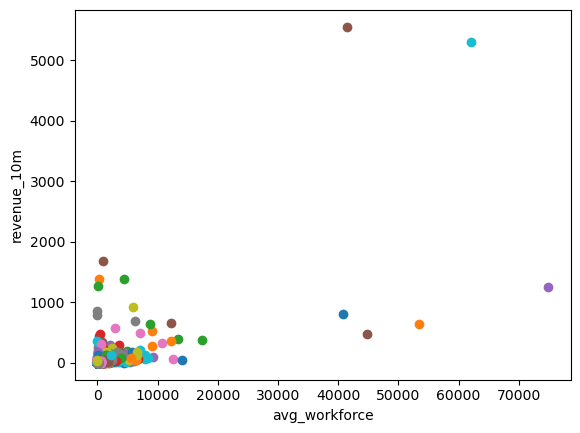

In [85]:
#Model 1

kmeans = KMeans(n_clusters=200, random_state=11) #n_clusters: we specify how many clusters we want  #random state 11 doesn't really matter, it's just a randomizing calculation method 
kmeans.fit(features_df_1) #retrieving the model

# assign a cluster to each example
labels = kmeans.predict(features_df_1) #should the item go close to 0 or should it go close to 1

# retrieve unique clusters
clusters = np.unique(labels)


# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(features_df_1.to_numpy()[row_ix, 0], features_df_1.to_numpy()[row_ix,1])
    plt.xlabel('avg_workforce')
    plt.ylabel('revenue_10m')
    title = "avg_workforce vs revenue_10m with {n_clusters} clusters"
    # show the plot
plt.show()

C:\Users\Javier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


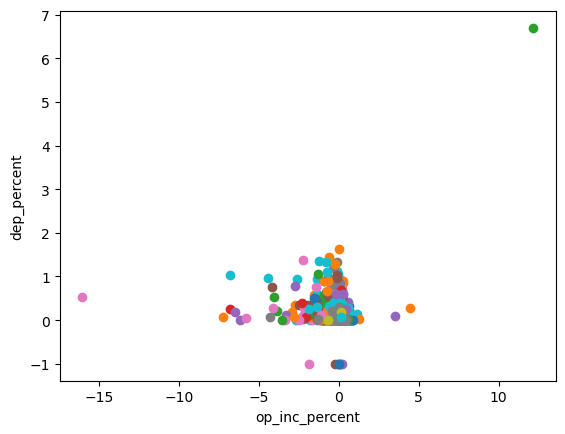

In [86]:
#Model 1

kmeans = KMeans(n_clusters=200, random_state=11) #n_clusters: we specify how many clusters we want  #random state 11 doesn't really matter, it's just a randomizing calculation method 
kmeans.fit(features_df_1) #retrieving the model

# assign a cluster to each example
labels = kmeans.predict(features_df_1) #should the item go close to 0 or should it go close to 1

# retrieve unique clusters
clusters = np.unique(labels)


# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(features_df_1.to_numpy()[row_ix, 2], features_df_1.to_numpy()[row_ix,3])
    plt.xlabel('op_inc_percent')
    plt.ylabel('dep_percent')
    title = "'op_inc_percent'vs 'dep_percent' with {n_clusters} clusters"
    # show the plot
plt.show()

C:\Users\Javier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


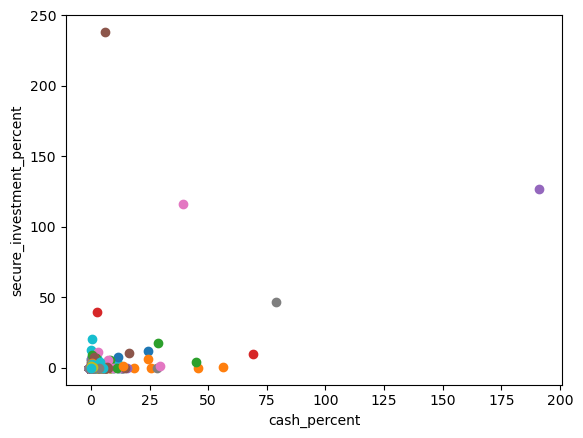

In [87]:
#Model 1

kmeans = KMeans(n_clusters=200, random_state=11) #n_clusters: we specify how many clusters we want  #random state 11 doesn't really matter, it's just a randomizing calculation method 
kmeans.fit(features_df_1) #retrieving the model

# assign a cluster to each example
labels = kmeans.predict(features_df_1) #should the item go close to 0 or should it go close to 1

# retrieve unique clusters
clusters = np.unique(labels)


# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(features_df_1.to_numpy()[row_ix, 6], features_df_1.to_numpy()[row_ix,7])
    plt.xlabel('cash_percent')
    plt.ylabel('secure_investment_percent')
    title = "'cash_percent' vs 'secure_investment_percent' with {n_clusters} clusters"
    # show the plot
plt.show()

C:\Users\Javier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


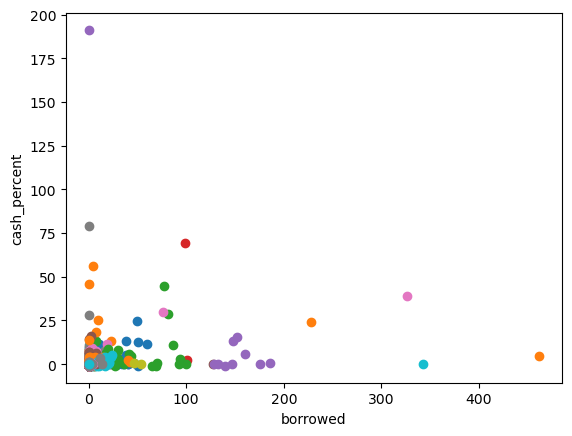

In [89]:
#Model 1

kmeans = KMeans(n_clusters=200, random_state=11) #n_clusters: we specify how many clusters we want  #random state 11 doesn't really matter, it's just a randomizing calculation method 
kmeans.fit(features_df_1) #retrieving the model

# assign a cluster to each example
labels = kmeans.predict(features_df_1) #should the item go close to 0 or should it go close to 1

# retrieve unique clusters
clusters = np.unique(labels)


# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(features_df_1.to_numpy()[row_ix, 4], features_df_1.to_numpy()[row_ix,6])
    plt.xlabel('borrowed')
    plt.ylabel('cash_percent')
    title = "'borrowed' vs 'cash_percent' with {n_clusters} clusters"
    # show the plot
plt.show()

In [93]:
#Creating the clusters in the reference dataframe, here df_numbers_light wihtout -1 for workforce
# FOR MODEL 1
companies_clustered_df = df_numbers_light_bis.copy()
companies_clustered_df['cluster_km200'] = km200.labels_

companies_clustered_df

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
0,ELECTRICITE DE FRANCE,552081317,3511Z,62035.0,q10,5300.100000,0.048433,0.082319,1.084847,0.000000,0.158431,0.247807,8
1,SYXPERIANE,497541599,6202A,53.0,q7,0.791771,0.239463,0.004650,0.041933,0.000000,0.175963,0.176819,150
2,GD REAUMUR,814116612,7010Z,153.0,q9,0.791110,0.042766,0.000000,0.098574,0.000000,0.096621,0.000000,171
11,OFFICE DU FONCTIONNEL,330929662,2599A,32.0,q5,0.790152,0.021784,0.039913,0.246041,0.034143,0.159516,0.000000,179
16,EPISTEMA,433698032,5829C,55.0,q7,0.788528,0.071904,0.101234,0.000000,0.000000,0.026502,0.000000,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,SOC VERTE LIGNE NORD SUD,379273485,4622Z,21.0,q3,0.500953,0.070596,0.013934,0.043332,0.000000,0.246969,0.150460,9
16926,PARIS ROUEN CARRELAGE,815068234,4333Z,20.0,q3,0.500944,0.043349,0.002617,0.195033,0.000000,0.215224,0.000000,9
16928,FACILY BAT,499793651,4399C,12.0,q2,0.500769,0.059508,0.002313,0.080414,0.032084,0.025872,0.000000,155
16929,CARLO GAVAZZI SARL,314008384,4652Z,12.0,q2,0.500711,0.061303,0.004022,0.000000,0.000000,0.123009,0.000000,155


In [95]:
siren_check_list=list(random_rows['siren'])
siren_check_list

[808631691,
 692049786,
 510728470,
 998229702,
 501081137,
 535217723,
 411756638,
 500674056,
 451980601,
 964201123]

In [98]:
random_rows

,,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,decile
decile,,,,,,,,,,,,,,
1,7230,LINKSURY,482533320,4642Z,8.0,q1,0.430558,0.011855,0.005602,0.045867,0.0,0.009909,0.002090,1
2,3416,RGREEN INVEST,797827995,6630Z,13.0,q2,1.330909,0.502561,0.003922,0.003363,0.0,0.528887,0.000000,2
3,16135,SOLPOM,798477469,4631Z,15.0,q3,0.961835,0.044027,0.003158,0.019386,0.0,0.001101,0.000000,3
4,13364,EUROLEC 2000,449609981,4321A,27.0,q4,0.818198,0.019027,0.001627,0.285675,0.0,0.121547,0.000000,4
5,7765,ECOLE DE CONDE,423349125,8542Z,32.0,q5,0.392927,0.284484,0.049924,0.156961,0.0,0.045546,0.285244,5
6,15101,SOCIETE D'ETUDES ET DE REALISATION D'INSTALLAT...,308276088,4321A,48.0,q6,4.221433,0.147865,0.002838,0.032294,0.0,0.064802,0.000000,6
7,11332,CHECKPOINT SYSTEMS FRANCE SAS,321692774,4669C,71.0,q7,2.592301,0.066881,0.001436,0.000000,0.0,0.049864,0.000000,7
8,15584,SGS INTERNATIONAL CERTIFICATION SERVICE,403293103,7120B,120.0,q8,1.774691,0.007527,0.000333,0.222294,0.0,0.000010,0.000000,8
9,1368,ZARA HOME FRANCE,488000969,4771Z,266.0,q9,5.218484,0.087160,0.083767,0.023468,0.0,0.011892,0.000000,9


In [99]:
def cluster_check(num):
    """getting the table of the cluster from the siren number"""
    cluster = companies_clustered_df[companies_clustered_df['siren'] == num]['cluster_km200'].iloc[0]
    return companies_clustered_df[companies_clustered_df['cluster_km200'] == cluster]

In [114]:
test = companies_clustered_df[companies_clustered_df['siren'] == siren_check_list[0]]['cluster_km200'].iloc[0]

cluster_check(siren_check_list[0])


,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
21,PERRIER PRESTIGE,478341266,4690Z,3.0,q1,0.787193,0.102329,0.000939,0.003124,0.0,0.292778,0.000000,70
46,GBS,342710381,4332C,1.0,q1,0.780722,0.179016,0.005015,-0.000299,0.0,0.088345,0.054796,70
55,AMOREPACIFIC EUROPE,379384225,4645Z,7.0,q1,0.779056,0.011592,0.000383,0.000000,0.0,0.323290,0.000000,70
71,HENRY,509925608,5911B,3.0,q1,0.773078,0.078405,0.002663,0.001895,0.0,0.087762,0.000000,70
85,ZENITH CAPITAL,825346067,6622Z,2.0,q1,0.768818,0.193067,0.001990,0.010515,0.0,0.129824,0.000000,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16883,INOVALLEY,572164028,4669B,8.0,q1,0.515264,0.046244,0.002297,0.115012,0.0,0.029114,0.000000,70
16889,TRIANGLE 6,454019514,7820Z,5.0,q1,0.512818,0.041900,0.000533,0.059945,0.0,-1.000000,0.000000,70
16904,ARTECA,330825068,4676Z,5.0,q1,0.508112,0.051787,0.096426,0.954559,0.0,0.596833,0.000000,70
16905,TRIANGLE 26,443579768,7820Z,6.0,q1,0.507604,0.055191,0.000128,0.062897,0.0,0.000000,0.000000,70


In [115]:
cluster_check(siren_check_list[1])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
29,APOTHICOM DISTRIBUTION,501839971,4646Z,10.0,q2,0.784582,0.175730,0.027261,0.009216,0.000000,0.314509,0.002305,155
75,BAG'S VILLE,398007153,4649Z,11.0,q2,0.772051,0.009613,0.000654,0.057672,0.000000,0.056430,0.005671,155
89,LIME,840180624,7721Z,10.0,q2,0.768119,0.047907,0.000345,0.151355,0.000000,0.006223,0.000000,155
120,CABINET PROTHESE DENTAIRE ROLES,342544004,3250A,10.0,q2,0.761800,0.359457,0.000349,0.000099,0.000000,0.060863,0.000000,155
135,TILDER,380780262,7021Z,12.0,q2,0.759700,0.431223,0.016454,0.000000,0.000000,0.060024,0.132157,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16877,KALHYGE DEVELOPPEMENT,488607607,6420Z,9.0,q2,0.517071,-0.018589,0.000000,0.000000,0.000000,0.011884,0.000000,155
16894,GYRDIS,702029893,3312Z,11.0,q2,0.511519,0.165389,0.013351,0.093236,0.000000,0.045922,0.215360,155
16912,TALOS,443452149,3320C,12.0,q2,0.506233,0.077464,0.023540,0.098301,0.000000,0.019930,0.000000,155
16928,FACILY BAT,499793651,4399C,12.0,q2,0.500769,0.059508,0.002313,0.080414,0.032084,0.025872,0.000000,155


In [116]:
cluster_check(siren_check_list[2])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
22,CABINET REMY LE BONNOIS,438406837,6910Z,21.0,q3,0.786380,0.169725,0.011468,0.089765,0.000000,0.054582,0.002395,9
25,YUVA,487651085,6202A,21.0,q3,0.785582,-0.143121,0.005770,0.056218,0.000000,0.108799,0.032062,9
38,ARTEMIDE FRANCE,438277865,4647Z,21.0,q3,0.782500,0.007174,0.002133,0.000000,0.000000,0.002868,0.000000,9
61,L'ECOLE VAN CLEEF & ARPELS,433901485,8532Z,21.0,q3,0.776714,0.037749,0.016315,0.128758,0.000000,0.000179,0.000000,9
83,TECHNICOLOR ANIMATION PRODUCTIONS,797830106,5911A,15.0,q3,0.769070,-0.612184,1.435178,0.984515,0.000000,0.000674,0.000000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914,ECN,335044236,2920Z,20.0,q3,0.505720,0.152438,0.048391,0.107466,0.000000,0.105739,0.810777,9
16921,MADENR,384775151,2651B,20.0,q3,0.503124,0.064951,0.004672,0.073584,0.000043,0.053494,0.000000,9
16923,GROUPE PSV,642033443,2893Z,18.0,q3,0.502574,0.013825,0.007437,0.102596,0.000000,0.000071,0.000097,9
16925,SOC VERTE LIGNE NORD SUD,379273485,4622Z,21.0,q3,0.500953,0.070596,0.013934,0.043332,0.000000,0.246969,0.150460,9


In [117]:
cluster_check(siren_check_list[3])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
36,EBAY FRANCE,432778108,7022Z,26.0,q4,0.782699,0.079097,0.069303,0.000000,0.000000,1.019762,0.000000,109
84,PATRY,702033077,3020Z,23.0,q4,0.768964,0.118766,0.015222,0.005408,0.000000,0.099378,0.437482,109
88,INTRALINKS EMEA FRANCE,528688286,7490B,22.0,q4,0.768542,0.077845,0.001595,0.034633,0.000000,0.020112,0.000000,109
111,LES CERCLES DE LA FORME DEVELOPPEMENT - CDFD,790178016,7010Z,27.0,q4,0.763178,0.213612,0.007679,0.652296,0.000000,0.137972,0.000000,109
148,KENEO,503637761,7022Z,24.0,q4,0.758478,0.015052,0.000809,0.000000,0.000000,0.257665,0.000000,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,SODIMATE,318648508,4669B,23.0,q4,0.517376,0.134031,0.003884,0.016991,0.024287,0.032048,0.058334,109
16897,INCUB'ETHIC SAS,518964705,7112B,27.0,q4,0.511145,0.022329,0.024098,0.124149,0.000000,0.162227,0.019596,109
16899,IMPRIMERIE GEORGES GRENIER,622053189,1812Z,26.0,q4,0.510042,0.057016,0.016290,0.190229,0.023656,0.134284,0.000000,109
16916,MEAUXCAS,843965559,4752B,22.0,q4,0.505469,-0.179425,0.028772,1.263323,0.000000,0.006125,0.000000,109


In [122]:
cluster_check(siren_check_list[4])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
2236,SEGRO FRANCE,722053691,6820B,37.0,q5,2.404741,0.286077,0.189758,25.700048,0.0,0.015611,0.000000,185
2655,GROUPE INDUSTRIEL MARCEL DASSAULT,400628079,6430Z,31.0,q5,1.873290,-0.572314,0.107917,40.527438,0.0,2.042644,7.103413,185
2821,CHOLET DUPONT OUDART,340412063,6619B,36.0,q5,1.722804,0.125281,0.015008,14.716908,0.0,3.934701,3.209818,185
3594,BGFIBANK EUROPE,511432940,6619B,39.0,q5,1.249007,0.251265,0.021251,19.916928,0.0,8.466534,0.000000,185
3816,CREDIT MUTUEL EQUITY,562118299,6612Z,45.0,q6,1.148613,-1.063359,0.010954,17.413682,0.0,4.095879,0.000000,185
4115,GROUPE PARTOUCHE,588801464,7010Z,43.0,q6,1.030500,-0.648811,0.095099,43.873362,0.0,4.546531,1.075012,185
4399,NEHS DEVELOPPEMENT,804751998,6420Z,35.0,q5,0.944332,-0.507951,0.001943,26.365943,0.0,1.349184,0.000000,185
4917,SRT GROUP,808233399,5829C,34.0,q5,0.812674,-0.709718,0.658668,15.515719,0.0,0.000000,0.000000,185
5211,NEW PRIMONIAL HOLDING 2,852684380,6630Z,42.0,q6,0.667711,-0.458221,0.000000,27.101115,0.0,-1.000000,-0.000150,185
7003,KALLISTA ENERGY,513771675,8299Z,41.0,q6,0.448615,-0.845071,0.026191,29.703977,0.0,2.960675,0.000000,185


In [119]:
cluster_check(siren_check_list[5])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
1,SYXPERIANE,497541599,6202A,53.0,q7,0.791771,0.239463,0.004650,0.041933,0.000000,0.175963,0.176819,150
87,LIBRAIRIE-EDITIONS L'HARMATTAN,311023121,5811Z,47.0,q6,0.768563,0.106923,0.017117,0.234374,0.000000,0.050359,0.013011,150
130,AGEMS ANESTHESIE BLOC OPERATOIRE,811158336,7820Z,50.0,q6,0.760467,0.105457,0.000000,0.003552,0.000000,0.059034,0.000000,150
166,USER ADGENTS,432694735,7311Z,48.0,q6,0.753350,0.111708,0.003145,0.001211,0.000000,0.000000,0.000000,150
200,RIMOWA FRANCE,809876188,4772B,50.0,q6,0.748755,0.000915,0.091706,0.000000,0.000000,0.000337,0.000000,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16722,PUBADRESSE ROUTAGE,380463059,8219Z,47.0,q6,0.577339,-0.017983,0.033708,0.589016,0.000000,0.153032,0.004245,150
16742,SONOGO,440017861,5610C,49.0,q6,0.568518,0.194607,0.027223,0.125565,0.000000,0.193850,0.000000,150
16775,PREVOST LUXE,800116105,4941A,52.0,q7,0.554492,0.007603,0.015741,0.046946,0.375022,0.064424,0.000000,150
16821,THIAIS,450896816,8710A,52.0,q7,0.536632,0.189321,0.021134,0.048920,0.000000,0.004504,0.000000,150


In [123]:
cluster_check(siren_check_list[6])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
32,EXPERTAM,411798622,7120B,65.0,q7,0.783523,0.090455,0.014702,0.148720,0.0,0.250553,0.000000,21
76,D S SECURITE PRIVEE,388321499,8010Z,71.0,q7,0.771907,0.075826,0.009162,0.059701,0.0,0.010524,0.557421,21
78,PHENIX SAS,801333808,4791A,70.0,q7,0.770736,0.088155,0.021606,0.000000,0.0,1.286374,0.002790,21
98,FRANCHOO,481656585,4772A,65.0,q7,0.766002,-0.249542,0.085803,1.865572,0.0,0.047982,0.000000,21
169,QWANT,532867256,6312Z,68.0,q7,0.753088,-1.413497,0.474961,4.227970,0.0,0.994556,0.000000,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,MAISONS ALFORT,449886134,8710A,65.0,q7,0.618925,0.143668,0.018924,0.083345,0.0,0.000039,0.000000,21
16656,SC-2,484299953,5210B,66.0,q7,0.607333,0.023726,0.017561,0.444809,0.0,0.140689,0.000000,21
16706,CHARPENTIER PM,309708279,4399C,69.0,q7,0.584677,0.024012,0.036137,0.247789,0.0,0.466613,0.022378,21
16802,SCARUS INTERIM,408300549,7820Z,72.0,q7,0.543119,0.015876,0.000139,0.016438,0.0,0.000000,0.000000,21


In [124]:
cluster_check(siren_check_list[7])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
326,INVOKE,440427904,5829C,117.0,q8,0.722122,-0.013558,0.106684,0.550338,0.0,1.105121,0.013295,105
359,CITEMETRIE,350662862,7112B,117.0,q8,0.715895,0.136736,0.009235,0.139268,0.0,0.116603,0.000000,105
704,ORGANON FRANCE,880042775,4646Z,114.0,q8,21.792346,0.063872,0.000433,0.000000,0.0,0.000000,0.000000,105
817,CRITEO FRANCE,520843780,6202A,117.0,q8,14.856724,0.005046,0.000000,0.000473,0.0,0.015528,0.000000,105
899,E-FRONT,403913700,6202B,117.0,q8,11.918247,-0.027673,0.028303,0.000000,0.0,0.111560,0.000102,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15750,OMMIC,409768264,2611Z,110.0,q8,1.438531,-0.206811,0.073769,1.195527,0.0,0.054584,0.000000,105
15761,MDB,837756063,4332A,115.0,q8,1.422787,0.013516,0.014900,0.000000,0.0,0.000000,0.000000,105
16175,VIAPOST MAINTENANCE,519871305,3312Z,122.0,q8,0.917180,0.039083,0.000916,0.000000,0.0,0.000000,0.000000,105
16378,LUSATEC,448536375,8121Z,113.0,q8,0.769818,0.063636,0.006108,0.157715,0.0,0.074343,0.000000,105


In [125]:
cluster_check(siren_check_list[8])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
2,GD REAUMUR,814116612,7010Z,153.0,q9,0.791110,0.042766,0.000000,0.098574,0.0,0.096621,0.000000,171
336,SOCIETE TOURISTIQUE DU CAIRE,444296719,7010Z,158.0,q9,0.719993,-0.037458,0.032338,0.076321,0.0,0.389704,0.000000,171
876,INTERXION FRANCE,423945799,6311Z,159.0,q9,12.847591,0.061659,0.223689,2.963217,0.0,0.001012,0.000000,171
902,FONCIER CONSEIL - SOCIETE EN NOM COLLECTIF,732014964,4299Z,156.0,q9,11.724173,0.044813,0.000777,0.392288,0.0,0.014403,0.000000,171
1014,CLIMESPACE,378993455,3530Z,158.0,q9,9.381773,0.248752,0.146390,0.560557,0.0,0.000000,0.000000,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,ECOLE SPECIALE DES TRAVAUX PUBLICS DU BATIMENT...,325002111,8542Z,150.0,q9,1.901759,0.075409,0.136821,1.979091,0.0,0.133079,0.233182,171
15581,MANDAE,798671335,6622Z,152.0,q9,1.782624,0.096073,0.010246,0.001892,0.0,0.098696,0.437578,171
15634,SOCIETE PREVOTE-LOCATION,301770053,4941C,151.0,q9,1.671957,0.077914,0.113022,0.166432,0.0,0.328277,0.376511,171
16534,LUSITANIE FRANCE NETTOYAGE,789053964,8121Z,149.0,q9,0.663695,0.036412,0.012983,0.165941,0.0,0.242290,0.000000,171


In [126]:
cluster_check(siren_check_list[9])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
469,JACOBS DOUWE EGBERTS FR SAS,810029413,4637Z,361.0,q10,155.880652,0.020411,0.000620,0.000000,0.0,0.000005,0.0,193
9877,INTERSPORT FRANCE,964201123,4619A,363.0,q10,168.739553,0.013819,0.003042,0.016506,0.0,0.001338,0.0,193
14680,BP FRANCE,542034327,4671Z,309.0,q10,180.500000,0.017175,0.011634,0.000000,0.0,0.000554,0.0,193


In [88]:
# Model 2
km200 = KMeans(200)
scaler = MinMaxScaler() # creating the 'scaler'
scaled_features = scaler.fit_transform(features_df_1) # to fit the scale on our features
km200.fit(scaled_features) # using the scaled model


C:\Users\Javier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=200)

C:\Users\Javier\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


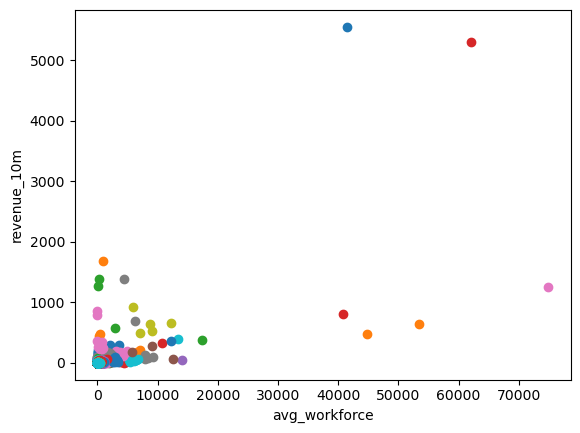

In [89]:
#Model 2

kmeans = KMeans(n_clusters=200, random_state=11) #n_clusters: we specify how many clusters we want  #random state 11 doesn't really matter, it's just a randomizing calculation method 
kmeans.fit(scaled_features) #retrieving the model

# assign a cluster to each example
labels = kmeans.predict(scaled_features) #should the item go close to 0 or should it go close to 1

# retrieve unique clusters
clusters = np.unique(labels)


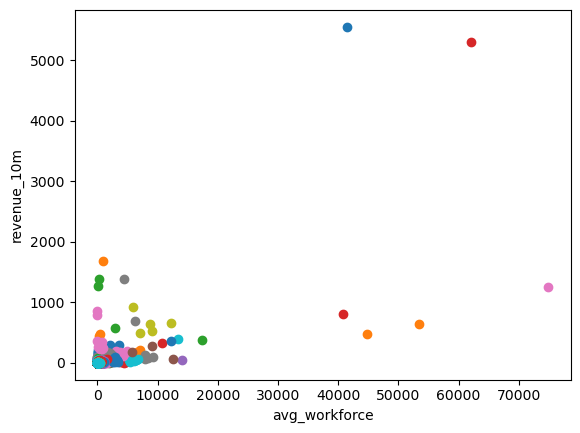

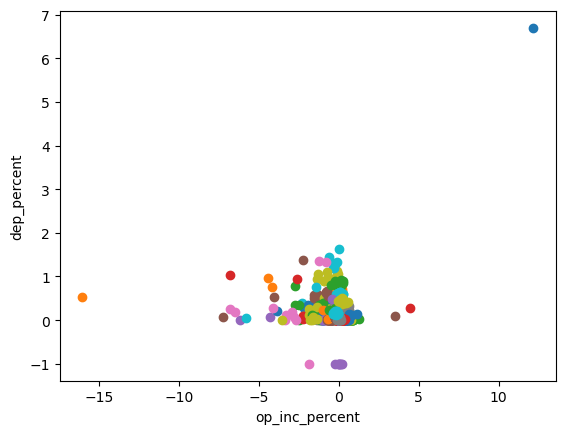

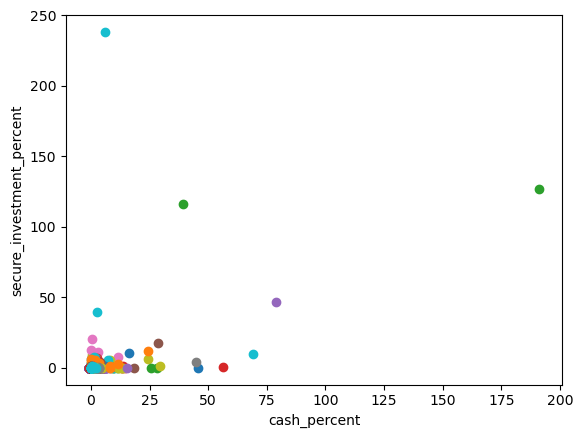

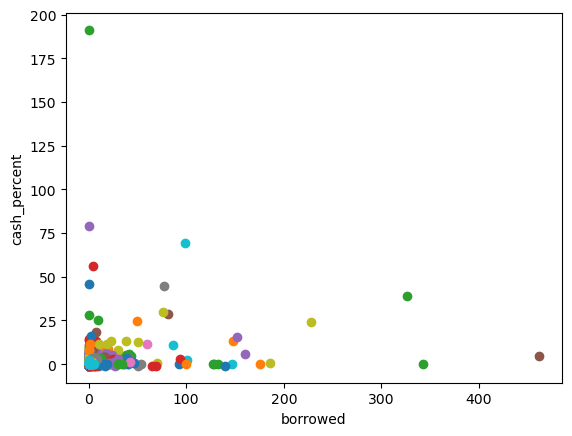

In [91]:
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(features_df_1.to_numpy()[row_ix, 0], features_df_1.to_numpy()[row_ix,1])
    plt.xlabel('avg_workforce')
    plt.ylabel('revenue_10m')
    title = "avg_workforce vs revenue_10m with {n_clusters} clusters"
    # show the plot
plt.show()

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(features_df_1.to_numpy()[row_ix, 2], features_df_1.to_numpy()[row_ix,3])
    plt.xlabel('op_inc_percent')
    plt.ylabel('dep_percent')
    title = "'op_inc_percent'vs 'dep_percent' with {n_clusters} clusters"
    # show the plot
plt.show()

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(features_df_1.to_numpy()[row_ix, 6], features_df_1.to_numpy()[row_ix,7])
    plt.xlabel('cash_percent')
    plt.ylabel('secure_investment_percent')
    title = "'cash_percent' vs 'secure_investment_percent' with {n_clusters} clusters"
    # show the plot
plt.show()

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(features_df_1.to_numpy()[row_ix, 4], features_df_1.to_numpy()[row_ix,6])
    plt.xlabel('borrowed')
    plt.ylabel('cash_percent')
    title = "'borrowed' vs 'cash_percent' with {n_clusters} clusters"
    # show the plot
plt.show()

In [96]:
#Creating the clusters in the reference dataframe, here df_numbers_light wihtout -1 for workforce
# FOR MODEL 2
companies_clustered_df = df_numbers_light_bis.copy()
companies_clustered_df['cluster_km200'] = km200.labels_

companies_clustered_df

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
0,ELECTRICITE DE FRANCE,552081317,3511Z,62035.0,q10,5300.100000,0.048433,0.082319,1.084847,0.000000,0.158431,0.247807,7
1,SYXPERIANE,497541599,6202A,53.0,q7,0.791771,0.239463,0.004650,0.041933,0.000000,0.175963,0.176819,26
2,GD REAUMUR,814116612,7010Z,153.0,q9,0.791110,0.042766,0.000000,0.098574,0.000000,0.096621,0.000000,134
11,OFFICE DU FONCTIONNEL,330929662,2599A,32.0,q5,0.790152,0.021784,0.039913,0.246041,0.034143,0.159516,0.000000,174
16,EPISTEMA,433698032,5829C,55.0,q7,0.788528,0.071904,0.101234,0.000000,0.000000,0.026502,0.000000,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,SOC VERTE LIGNE NORD SUD,379273485,4622Z,21.0,q3,0.500953,0.070596,0.013934,0.043332,0.000000,0.246969,0.150460,131
16926,PARIS ROUEN CARRELAGE,815068234,4333Z,20.0,q3,0.500944,0.043349,0.002617,0.195033,0.000000,0.215224,0.000000,131
16928,FACILY BAT,499793651,4399C,12.0,q2,0.500769,0.059508,0.002313,0.080414,0.032084,0.025872,0.000000,131
16929,CARLO GAVAZZI SARL,314008384,4652Z,12.0,q2,0.500711,0.061303,0.004022,0.000000,0.000000,0.123009,0.000000,131


In [97]:
siren_check_list=list(random_rows['siren'])
siren_check_list

[482533320,
 797827995,
 798477469,
 449609981,
 423349125,
 308276088,
 321692774,
 403293103,
 488000969,
 428781983]

In [100]:
cluster_check(siren_check_list[0])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
38,ARTEMIDE FRANCE,438277865,4647Z,21.0,q3,0.782500,0.007174,0.002133,0.000000,0.0,0.002868,0.000000,0
45,MOTT MACDONALD FRANCE,523138758,7022Z,42.0,q6,0.781045,0.020688,0.003060,0.005379,0.0,0.170201,0.000000,0
55,AMOREPACIFIC EUROPE,379384225,4645Z,7.0,q1,0.779056,0.011592,0.000383,0.000000,0.0,0.323290,0.000000,0
58,AD BEAUTY,485205520,4645Z,39.0,q5,0.778121,0.035365,0.002620,0.000490,0.0,0.045737,0.000000,0
75,BAG'S VILLE,398007153,4649Z,11.0,q2,0.772051,0.009613,0.000654,0.057672,0.0,0.056430,0.005671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16849,ESCO TRANSMISSIONS,788334746,4669B,13.0,q2,0.527904,-0.007420,0.015292,0.200344,0.0,0.000199,0.000000,0
16861,DERICHEBOURG ESPACES VERTS,389360652,8130Z,28.0,q4,0.522660,0.036768,0.008944,0.000000,0.0,0.046434,0.000000,0
16877,KALHYGE DEVELOPPEMENT,488607607,6420Z,9.0,q2,0.517071,-0.018589,0.000000,0.000000,0.0,0.011884,0.000000,0
16917,MISS FISH,408237642,4638A,2.0,q1,0.505189,0.027252,0.001545,0.037914,0.0,0.051175,0.000032,0


In [101]:
cluster_check(siren_check_list[1])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
135,TILDER,380780262,7021Z,12.0,q2,0.759700,0.431223,0.016454,0.000000e+00,0.000000,0.060024,0.132157,79
227,EURIDIS MANAGEMENT,410141196,8559A,15.0,q3,0.744302,0.475095,0.027589,3.037745e-04,0.000000,0.107309,0.000068,79
578,SOCIETE NATIONALE D'EXPLOITATION INDUSTRIELLE ...,331355263,1200Z,400.0,q10,38.288700,0.547624,0.003643,1.828216e-05,0.000000,0.000447,0.000000,79
583,CPR ASSET MANAGEMENT,399392141,6630Z,105.0,q8,36.951900,0.459735,0.000000,2.012075e-01,0.000000,0.000406,0.000000,79
770,ELEVA CAPITAL,829373075,6612Z,35.0,q5,17.720555,0.610934,0.000363,9.931969e-07,0.000000,0.561145,0.000000,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15170,OXY PHARM,448974253,3250A,37.0,q5,3.574841,0.551414,0.010384,1.185137e-01,0.040233,0.432275,0.000000,79
15228,SNC LAVALIN INTERNATIONAL,388054819,7112B,8.0,q1,3.189341,0.613435,0.000111,0.000000e+00,0.000000,0.057645,0.000000,79
15313,REVITACARE,451077606,4645Z,38.0,q5,2.669466,0.553508,0.008645,1.274250e-01,0.000000,0.578849,0.000000,79
15698,ATHOME,392629762,8299Z,47.0,q6,1.531841,0.479030,0.011640,8.154346e-02,0.000000,0.375449,0.000000,79


In [102]:
cluster_check(siren_check_list[2])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
71,HENRY,509925608,5911B,3.0,q1,0.773078,0.078405,0.002663,0.001895,0.000000,0.087762,0.000000,131
76,D S SECURITE PRIVEE,388321499,8010Z,71.0,q7,0.771907,0.075826,0.009162,0.059701,0.000000,0.010524,0.557421,131
88,INTRALINKS EMEA FRANCE,528688286,7490B,22.0,q4,0.768542,0.077845,0.001595,0.034633,0.000000,0.020112,0.000000,131
89,LIME,840180624,7721Z,10.0,q2,0.768119,0.047907,0.000345,0.151355,0.000000,0.006223,0.000000,131
99,CINCOM SYSTEMS FRANCE,304455140,5829C,28.0,q4,0.765999,0.098565,0.007024,0.000000,0.000000,0.030189,0.019582,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,SOC VERTE LIGNE NORD SUD,379273485,4622Z,21.0,q3,0.500953,0.070596,0.013934,0.043332,0.000000,0.246969,0.150460,131
16926,PARIS ROUEN CARRELAGE,815068234,4333Z,20.0,q3,0.500944,0.043349,0.002617,0.195033,0.000000,0.215224,0.000000,131
16928,FACILY BAT,499793651,4399C,12.0,q2,0.500769,0.059508,0.002313,0.080414,0.032084,0.025872,0.000000,131
16929,CARLO GAVAZZI SARL,314008384,4652Z,12.0,q2,0.500711,0.061303,0.004022,0.000000,0.000000,0.123009,0.000000,131


In [103]:
cluster_check(siren_check_list[3])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
38,ARTEMIDE FRANCE,438277865,4647Z,21.0,q3,0.782500,0.007174,0.002133,0.000000,0.0,0.002868,0.000000,0
45,MOTT MACDONALD FRANCE,523138758,7022Z,42.0,q6,0.781045,0.020688,0.003060,0.005379,0.0,0.170201,0.000000,0
55,AMOREPACIFIC EUROPE,379384225,4645Z,7.0,q1,0.779056,0.011592,0.000383,0.000000,0.0,0.323290,0.000000,0
58,AD BEAUTY,485205520,4645Z,39.0,q5,0.778121,0.035365,0.002620,0.000490,0.0,0.045737,0.000000,0
75,BAG'S VILLE,398007153,4649Z,11.0,q2,0.772051,0.009613,0.000654,0.057672,0.0,0.056430,0.005671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16849,ESCO TRANSMISSIONS,788334746,4669B,13.0,q2,0.527904,-0.007420,0.015292,0.200344,0.0,0.000199,0.000000,0
16861,DERICHEBOURG ESPACES VERTS,389360652,8130Z,28.0,q4,0.522660,0.036768,0.008944,0.000000,0.0,0.046434,0.000000,0
16877,KALHYGE DEVELOPPEMENT,488607607,6420Z,9.0,q2,0.517071,-0.018589,0.000000,0.000000,0.0,0.011884,0.000000,0
16917,MISS FISH,408237642,4638A,2.0,q1,0.505189,0.027252,0.001545,0.037914,0.0,0.051175,0.000032,0


In [104]:
cluster_check(siren_check_list[4])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
823,ALAIN AFFLELOU FRANCHISEUR SAS,304577794,7740Z,123.0,q8,14.539339,0.403718,0.042920,0.995827,0.000000,0.122458,0.002238,142
849,LEXISNEXIS,552029431,5814Z,397.0,q10,13.660886,0.365013,0.054801,0.001097,0.000000,0.000047,0.000000,142
869,COMPAGNIE INDUSTRIELLE MARITIME,390982635,5210B,263.0,q9,13.118600,0.424519,0.056294,0.680164,0.000000,0.678708,0.000000,142
1038,EPEX SPOT,508010501,6611Z,134.0,q9,8.953122,0.430316,0.058320,0.000000,0.000000,0.060875,0.000000,142
1134,GROUPE LA CENTRALE,318771623,5813Z,208.0,q9,7.264602,0.425425,0.072750,0.063525,0.000000,0.297348,0.000000,142
1219,LABORATOIRES VIVACY,498485275,2120Z,176.0,q9,6.432278,0.363899,0.033447,0.265022,0.000000,0.294992,0.000000,142
2036,LEKIOSQUE FR,493341473,6209Z,40.0,q5,2.734325,0.380483,0.032091,0.011907,0.000000,0.256342,0.815588,142
2452,SOCIETE EDITRICE DE MEDIAPART,500631932,5813Z,131.0,q9,2.131374,0.294061,0.035159,0.003269,0.000000,0.347633,0.001173,142
2736,CHRISTIAN LIAIGRE,393070099,4759A,44.0,q6,1.803867,0.375951,0.028468,0.261771,0.000000,0.009416,0.170874,142
2930,ENNOV,428692701,5829A,51.0,q6,1.631683,0.347967,0.055345,0.020997,0.000000,0.448571,0.021450,142


In [105]:
cluster_check(siren_check_list[5])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
21,PERRIER PRESTIGE,478341266,4690Z,3.0,q1,0.787193,0.102329,0.000939,0.003124,0.000000,0.292778,0.000000,184
22,CABINET REMY LE BONNOIS,438406837,6910Z,21.0,q3,0.786380,0.169725,0.011468,0.089765,0.000000,0.054582,0.002395,184
44,AU PIED DE COCHON,302971668,5610A,84.0,q8,0.781703,0.167285,0.010980,0.051695,0.000000,0.009199,0.000000,184
84,PATRY,702033077,3020Z,23.0,q4,0.768964,0.118766,0.015222,0.005408,0.000000,0.099378,0.437482,184
86,CABINET BOETTCHER,784330128,6910Z,16.0,q3,0.768666,0.162061,0.002088,0.077417,0.000000,0.125336,0.026019,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,SIMONA SA,946650025,4669B,7.0,q1,0.535073,0.112109,0.000713,0.000000,0.000000,0.214540,0.000000,184
16832,SOCIETE VB GAZ,339143265,4322B,37.0,q5,0.534090,0.163722,0.022418,0.005313,0.000000,0.072635,0.000000,184
16870,ALRYUS,493536882,7112B,5.0,q1,0.520125,0.133621,0.009316,0.002068,0.000000,0.282224,0.000000,184
16875,SODIMATE,318648508,4669B,23.0,q4,0.517376,0.134031,0.003884,0.016991,0.024287,0.032048,0.058334,184


In [106]:
cluster_check(siren_check_list[6])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
71,HENRY,509925608,5911B,3.0,q1,0.773078,0.078405,0.002663,0.001895,0.000000,0.087762,0.000000,131
76,D S SECURITE PRIVEE,388321499,8010Z,71.0,q7,0.771907,0.075826,0.009162,0.059701,0.000000,0.010524,0.557421,131
88,INTRALINKS EMEA FRANCE,528688286,7490B,22.0,q4,0.768542,0.077845,0.001595,0.034633,0.000000,0.020112,0.000000,131
89,LIME,840180624,7721Z,10.0,q2,0.768119,0.047907,0.000345,0.151355,0.000000,0.006223,0.000000,131
99,CINCOM SYSTEMS FRANCE,304455140,5829C,28.0,q4,0.765999,0.098565,0.007024,0.000000,0.000000,0.030189,0.019582,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,SOC VERTE LIGNE NORD SUD,379273485,4622Z,21.0,q3,0.500953,0.070596,0.013934,0.043332,0.000000,0.246969,0.150460,131
16926,PARIS ROUEN CARRELAGE,815068234,4333Z,20.0,q3,0.500944,0.043349,0.002617,0.195033,0.000000,0.215224,0.000000,131
16928,FACILY BAT,499793651,4399C,12.0,q2,0.500769,0.059508,0.002313,0.080414,0.032084,0.025872,0.000000,131
16929,CARLO GAVAZZI SARL,314008384,4652Z,12.0,q2,0.500711,0.061303,0.004022,0.000000,0.000000,0.123009,0.000000,131


In [107]:
cluster_check(siren_check_list[7])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
38,ARTEMIDE FRANCE,438277865,4647Z,21.0,q3,0.782500,0.007174,0.002133,0.000000,0.0,0.002868,0.000000,0
45,MOTT MACDONALD FRANCE,523138758,7022Z,42.0,q6,0.781045,0.020688,0.003060,0.005379,0.0,0.170201,0.000000,0
55,AMOREPACIFIC EUROPE,379384225,4645Z,7.0,q1,0.779056,0.011592,0.000383,0.000000,0.0,0.323290,0.000000,0
58,AD BEAUTY,485205520,4645Z,39.0,q5,0.778121,0.035365,0.002620,0.000490,0.0,0.045737,0.000000,0
75,BAG'S VILLE,398007153,4649Z,11.0,q2,0.772051,0.009613,0.000654,0.057672,0.0,0.056430,0.005671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16849,ESCO TRANSMISSIONS,788334746,4669B,13.0,q2,0.527904,-0.007420,0.015292,0.200344,0.0,0.000199,0.000000,0
16861,DERICHEBOURG ESPACES VERTS,389360652,8130Z,28.0,q4,0.522660,0.036768,0.008944,0.000000,0.0,0.046434,0.000000,0
16877,KALHYGE DEVELOPPEMENT,488607607,6420Z,9.0,q2,0.517071,-0.018589,0.000000,0.000000,0.0,0.011884,0.000000,0
16917,MISS FISH,408237642,4638A,2.0,q1,0.505189,0.027252,0.001545,0.037914,0.0,0.051175,0.000032,0


In [108]:
cluster_check(siren_check_list[8])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
16,EPISTEMA,433698032,5829C,55.0,q7,0.788528,0.071904,0.101234,0.000000,0.000000,0.026502,0.000000,182
200,RIMOWA FRANCE,809876188,4772B,50.0,q6,0.748755,0.000915,0.091706,0.000000,0.000000,0.000337,0.000000,182
229,NOVAXIA,495081051,7022Z,17.0,q3,0.743891,0.042444,0.078945,0.942361,0.000000,0.073286,0.000000,182
326,INVOKE,440427904,5829C,117.0,q8,0.722122,-0.013558,0.106684,0.550338,0.000000,1.105121,0.013295,182
376,PATHE BELLE EPINE,387469877,5914Z,30.0,q4,0.712809,-0.047375,0.090234,0.703691,0.000000,0.068516,0.000000,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16239,VAL HORIZON,578200776,3821Z,40.0,q5,0.862950,-0.011757,0.088919,0.000000,0.000000,0.000990,0.000000,182
16286,NORALSY,315319897,2630Z,44.0,q6,0.827707,-0.041163,0.095469,0.224900,0.001286,0.347005,0.002730,182
16359,ALLOMAT SA,672950177,7732Z,44.0,q6,0.784443,0.107947,0.111885,0.402556,0.000000,0.257745,0.066254,182
16505,BERTO IDF NORD-EST,391719200,4941C,96.0,q8,0.688098,-0.010325,0.108400,0.357630,0.000000,0.081341,0.005282,182


In [109]:
cluster_check(siren_check_list[9])

,denomination,siren,naf2_code,avg_workforce,size_group,revenue_10m,op_inc_percent,dep_percent,borrowed,rentals,cash_percent,secure_investment_percent,cluster_km200
65,RANGER,450246517,4799A,403.0,q10,0.775043,0.073417,0.004230,0.075985,0.000000,0.040063,0.010739,67
604,SOC DE DISTRIBUTION PRODUITS EDITION,702044710,4649Z,514.0,q10,33.224381,0.011825,0.007427,0.001246,0.000000,0.000238,0.000000,67
621,GREENFLEX,511840845,7740Z,395.0,q10,30.895205,-0.052058,0.020259,0.409040,0.000000,0.004695,0.000000,67
640,JACQUET BROSSARD DISTRIBUTION,318947132,4636Z,322.0,q10,27.949700,-0.006186,0.008229,-0.000014,-0.000007,0.000920,-0.000004,67
646,GIE AXA GROUP OPERATIONS FRANCE,351151196,8299Z,562.0,q10,27.495603,0.015007,0.026175,0.000000,0.000000,0.042980,0.000000,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15250,ELIOR SERVICES FM,391322831,8110Z,613.0,q10,3.043834,0.039159,0.009563,0.003894,0.000000,0.002366,0.000000,67
15465,DMH SECURITE,391716123,8010Z,486.0,q10,2.113386,0.023520,0.001395,0.000007,0.000000,0.037083,0.000000,67
15605,CHECKPORT SURETE,483174488,8010Z,425.0,q10,1.726714,-0.040882,0.005147,0.364393,0.000000,0.155617,0.000000,67
15896,ARMOR GROUPE,343539680,8121Z,350.0,q10,1.230852,0.019287,0.009948,0.145186,0.000000,0.282192,0.006506,67


In [112]:
companies_clustered_df['cluster_km200'].value_counts()

cluster_km200
0      1807
131    1310
184     686
174     509
134     443
       ... 
46        1
161       1
45        1
171       1
133       1
Name: count, Length: 200, dtype: int64

In [ ]:
# checking for a first company, to prepare a 1 line df

#company_df = prepare the data for test!!!

# scaled_company = scaler.transform(company_df) # scaling the chosen company
#km200.predict(scaled_company) #if it was the scaled model
#temp= km200.predict(scaled_song)

km200.predict(company_df)
temp= km200.predict(company_df)

# to see in which cluster
cluster_number = temp[0]
cluster_number